# Introduction
The attached dataset contains a sample from the Yellow Taxi Trip Records Data Set provided by the TLC of NYC. 

With this dataset I will study has a lot of details like pick-up and drop-off times, locations, passenger counts, trip distances, and payment types. With this data, I will try to find patterns and trends that are not easy to see.

## Table of Contents
### 1. Data Loading and Exploration: 
This initial phase involves loading the dataset into the environment and performing a preliminary exploration to familiarize myself with the data structure and contents.

### 2. Data Cleaning: 
Here, I'll identify and address issues in the dataset such as missing or inconsistent values, outliers, and irrelevant information. Ensuring the data's cleanliness is paramount for the accuracy of our subsequent analysis.

### 3. Feature Engineering: 
In this section, I'll construct new features from existing data that can provide us with deeper and more nuanced insights. This step could involve creating new variables or transforming existing ones to better suit our analysis.

### 4. Data Analysis and Visualization: 
This is the heart of the notebook. I'll be applying analytical techniques to unearth patterns and trends in the data. Additionally, we'll visualize our findings using engaging and informative plots.

### 5. Management Summary & Conclusion: 
Lastly, I'll encapsulate our key findings and provide a summary that caters to decision-makers. This section aims to translate our data-driven insights into actionable recommendations.

# Data Loading and Exploration

In [242]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

# Plot graphs directly under the coding cells
%matplotlib inline

# Pandas display 2 digits
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [243]:
# Load the dataset
df = pd.read_csv('../data/Yellow_Taxi_Assignment.csv')

# Load location dataset taken from "https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
location = pd.read_csv('../data/taxi+_zone_lookup.csv')

# Print first 5 rows of the dataframe
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.00,0.53,1.00,N,142,163,1,3.50,0.00,0.50,1.29,0.00,0.30,5.59,NaN,NaN
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.00,1.05,1.00,N,140,236,1,6.00,0.00,0.50,1.02,0.00,0.30,7.82,NaN,NaN
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.00,1.83,1.00,N,211,158,1,9.50,0.50,0.50,1.62,0.00,0.30,12.42,NaN,NaN
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.00,2.30,1.00,N,249,4,2,10.00,0.00,0.50,0.00,0.00,0.30,10.80,NaN,NaN
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.00,3.06,1.00,N,186,142,1,12.50,0.50,0.50,1.00,0.00,0.30,14.80,NaN,NaN


In [244]:
location.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [245]:
# View information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304978 entries, 0 to 304977
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               304978 non-null  int64  
 1   tpep_pickup_datetime   304978 non-null  object 
 2   tpep_dropoff_datetime  304978 non-null  object 
 3   passenger_count        295465 non-null  float64
 4   trip_distance          304978 non-null  float64
 5   RatecodeID             295465 non-null  float64
 6   store_and_fwd_flag     295465 non-null  object 
 7   PULocationID           304978 non-null  int64  
 8   DOLocationID           304978 non-null  int64  
 9   payment_type           304978 non-null  int64  
 10  fare_amount            304978 non-null  float64
 11  extra                  304978 non-null  float64
 12  mta_tax                304978 non-null  float64
 13  tip_amount             304978 non-null  float64
 14  tolls_amount           304978 non-nu

The _'VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'store_and_fwd_flag'_, and _'payment_type'_ fields are all categorical in nature. Even though they might be represented as integers, they are likely coded identifiers that do not hold any numerical significance.

Regarding the _'PULocationID'_ and _'DOLocationID'_ fields, even though they are numeric, they represent different geographic zones and should be treated as categorical.

_tpep_pickup_datetime_ and _tpep_dropoff_datetime_ are datetime fields, and I have to convert them into datetime format for more useful analysis.

In [246]:
# Convert necessary fields to categorical
categorical_cols = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type','store_and_fwd_flag']
for col in categorical_cols:
    df[col] = df[col].astype('category')
    
# Convert pickup and dropoff times to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [247]:
# Get summary statistics for the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,295465.00,1.48,1.11,0.00,1.00,1.00,2.00,6.00
trip_distance,304978.00,4.59,434.23,-16.86,1.00,1.73,3.21,177247.40
fare_amount,304978.00,13.51,12.64,-197.00,6.50,9.50,15.00,455.00
extra,304978.00,0.90,1.19,-6.00,0.00,0.50,1.00,18.50
mta_tax,304978.00,0.49,0.07,-0.50,0.50,0.50,0.50,2.54
tip_amount,304978.00,2.22,2.77,-20.00,0.00,1.86,2.95,115.56
tolls_amount,304978.00,0.39,1.70,-13.75,0.00,0.00,0.00,96.55
improvement_surcharge,304978.00,0.31,0.11,-1.00,0.30,0.30,0.30,1.00
total_amount,304978.00,19.05,15.46,-198.55,10.80,14.30,20.76,561.49
congestion_surcharge,232346.00,2.24,0.79,-2.50,2.50,2.50,2.50,2.75


### Summary of Initial Data Exploration
The summary statistics for the numerical columns provide useful insights into the data, as well as revealing potential data issues.

- __passenger_count__: Most taxi trips have one or two passengers, with a mean value of 1.48. The maximum value is 6 which is reasonable as it's the possible max capacity of a taxi. However, there are some trips with a count of 0, which might represent rides where the number of passengers wasn't recorded correctly.

- __trip_distance__: The average trip distance is around 4.59 miles. There are some trips with negative distances, which are not possible and must be data entry errors. Also, the maximum value is excessively high at 177247.4 miles, which is unlikely for a single taxi trip and is probably another data error.

- __fare_amount__: The average fare amount is about \\$13.51, but the minimum is a negative value (-\\$197), which doesn't make sense as fares can't be negative. This could be due to data entry errors.

- __extra__: This field represents extra charges and has a minimum value of -\\$6.00 and a maximum value of \\$18.50. Negative extra charges are unexpected and should be investigated further.

- __mta_tax__: This field, indicating a \\$0.50 MTA tax, has some values that are negative or more than \\$0.50, suggesting potential data errors..

- __tip_amount__: Tips average around \\$2.22, but the dataset contains some negative values, which don't make sense in this context.

- __tolls_amount__: This column contains some negative values as well. As tolls can't be negative, these values must be errors.

- __improvement_surcharge__: This field has a consistent value of \\$0.30 for most records, but there are some instances where the values are negative or exceed the typical amount. These anomalies suggest possible data errors.

- __total_amount__: The minimum total fare is -\\$198.55, which is not possible, indicating data errors in this column too.

- __congestion_surcharge__: Most entries show a congestion surcharge of \\$2.50, but there are also negative values in this field, which could be a data entry issue.

- __airport_fee__: It's mainly \\$0.00 or \\$1.25 for pickup at LaGuardia and John F. Kennedy Airports, however, there are negative values which don't make sense.


These observations suggest there might be some data quality issues that need further investigation. The next step would be to clean the data by addressing these issues.

# Data Cleaning

In this part I will take 3 steps to clean the data, Negative Values, Unrealistic Outliers and Missing Data.

## 1. Negative Values
Several columns including _trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge_, and _airport_fee_ have negative values, which are not possible given their nature.

To deal with these, I'll replace negative values with NaN, indicating missing data, and then use appropriate imputation strategies.

In [248]:
# Replace negative values with NaN
numeric_cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
                'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

for col in numeric_cols:
    df.loc[df[col] < 0, col] = np.nan

## 2. Missing Data
Missing data was identified in the _passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge_, and _airport_fee_ columns. I'll handle these by implementing suitable imputation strategies.

And since I've replaced the negative values with 'np.nan', these are now technically missing value in the dataset. Columns like _mta_tax, improvement_surcharge, airport_fee_ should be treated different, because they are essantially categorical.

In [249]:
# For categorical columns 'RatecodeID', 'store_and_fwd_flag', fill missing values with the mode (most common value)
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)

# For 'passenger_count', assume a missing passenger count likely means there was at least 1 passenger, and as single-passenger trips are the most common
df['passenger_count'].replace(0, np.nan, inplace=True)
df['passenger_count'].fillna(1, inplace=True)

# For 'congestion_surcharge' and 'airport_fee', assume that if the value is missing, no surcharge or fee was applied, so I'll fill with 0
df['congestion_surcharge'].fillna(0, inplace=True)
df['airport_fee'].fillna(0, inplace=True)

Before deciding which imputation (_Imputation with Mean/Median, Imputation with mode, Imputation with zero_) will be done for which value. I will create histogram plots to see skewness of the values

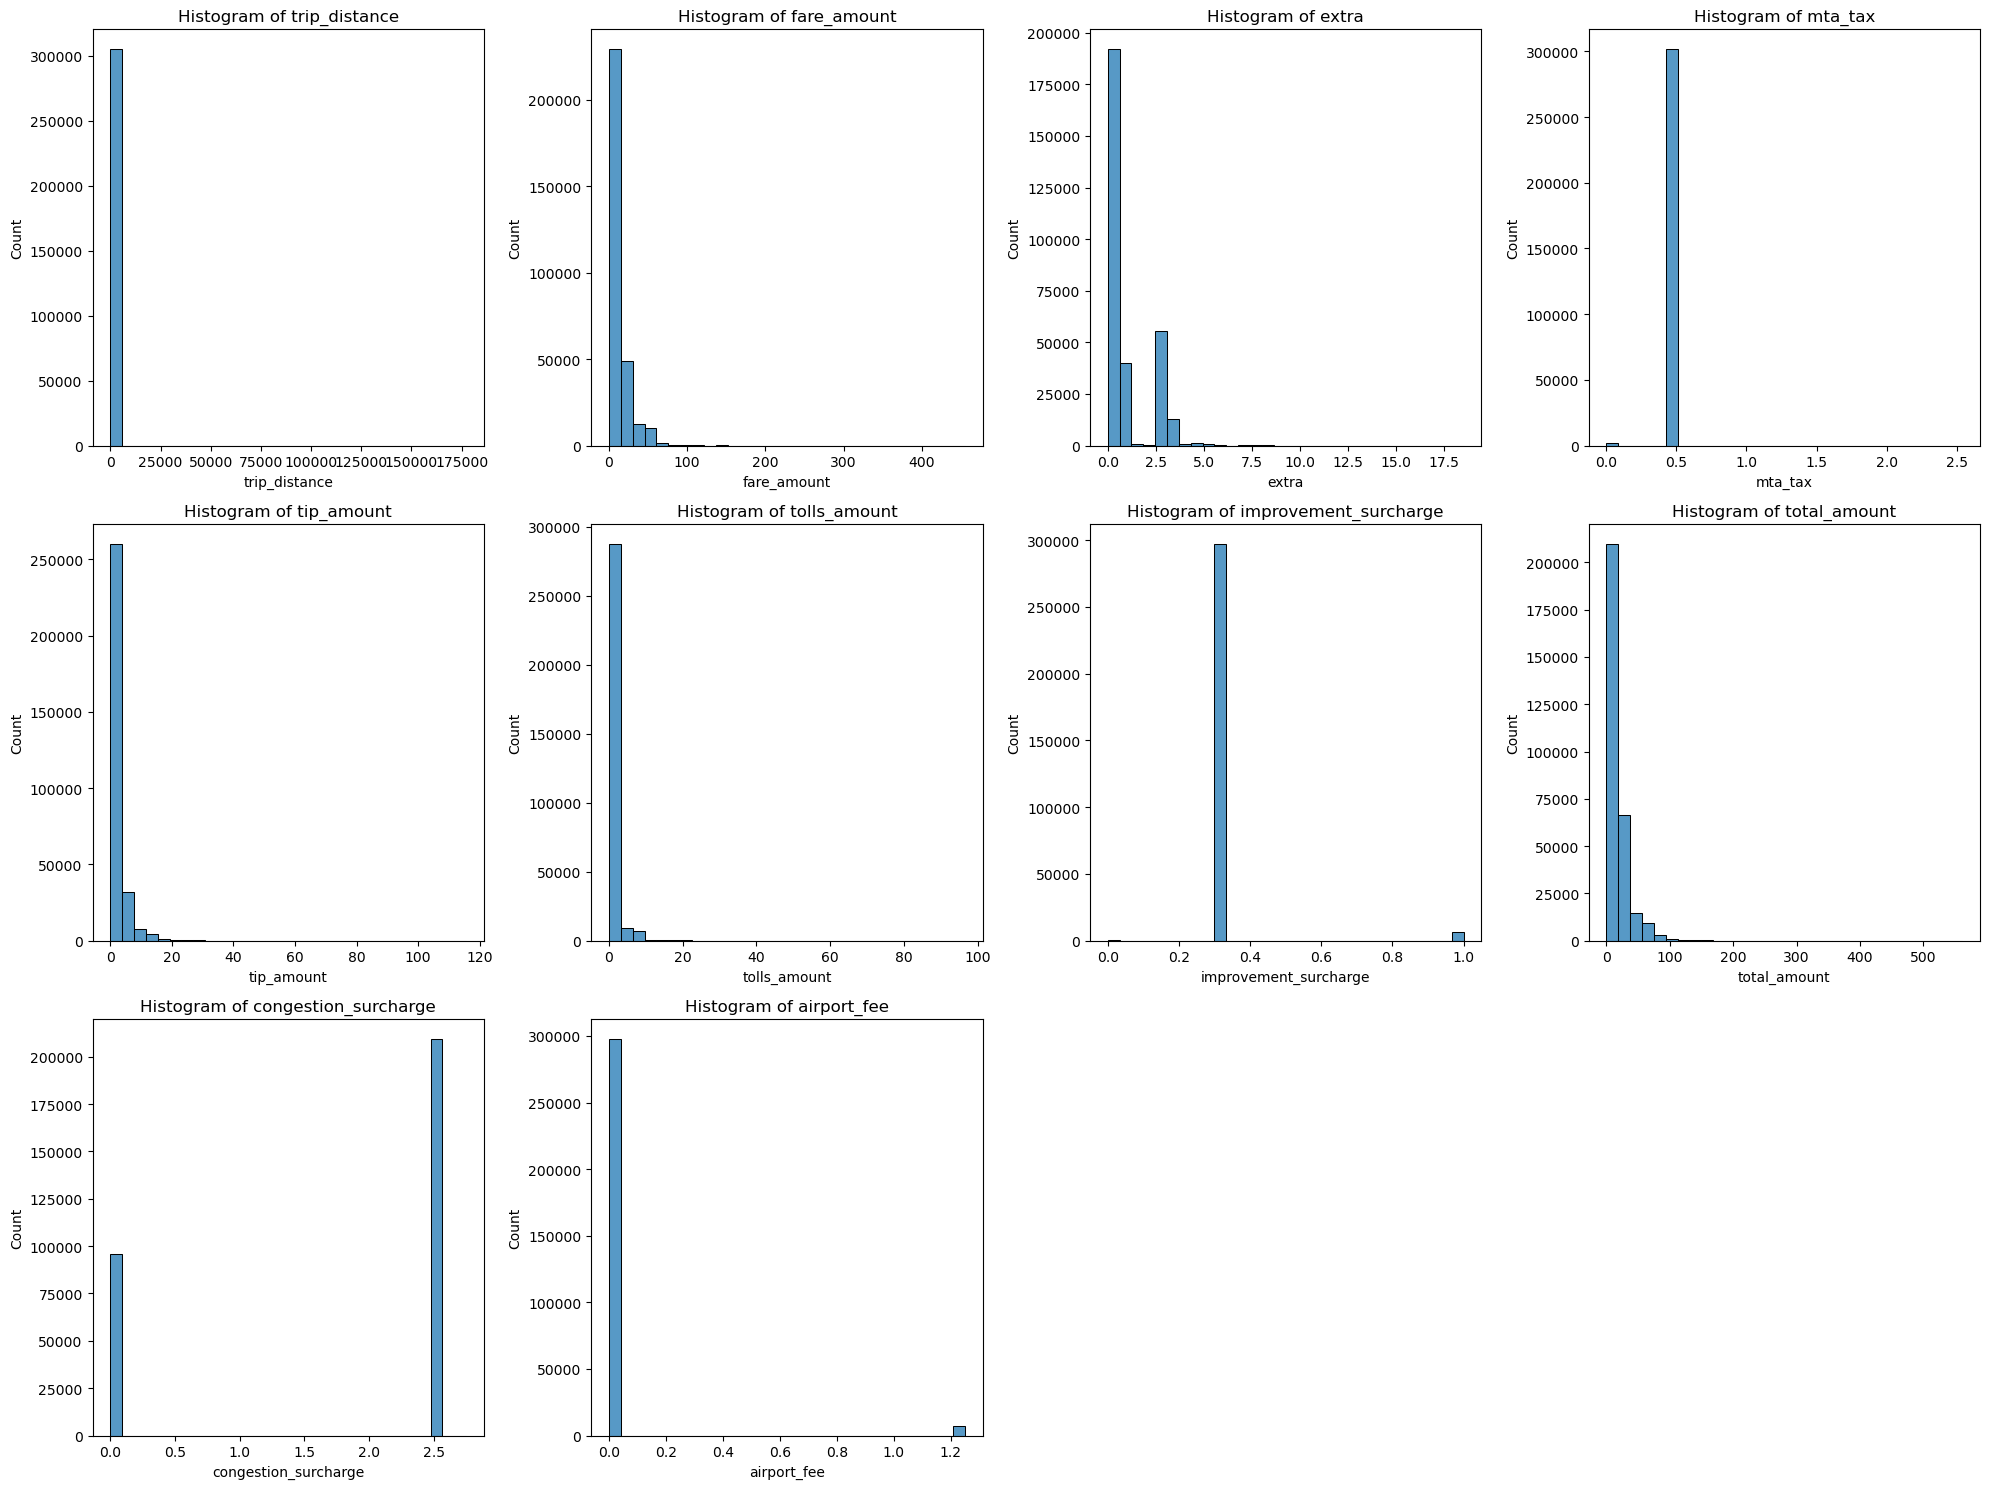

In [250]:
# List of columns for negative numerical values replaced with np.nan
cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 
        'tolls_amount', 'improvement_surcharge', 'total_amount', 
        'congestion_surcharge', 'airport_fee']

# Determine the number of rows and columns for subplot grid
n_rows = len(cols) // 4 + (len(cols) % 4 > 0)
n_cols = 4

# Create a larger figure
plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.savefig('../images/columns_for_negative_numerical_values_replaced_with_np_nan.png')
plt.show()

In [251]:
# For numerical columns 'trip_distance', 'fare_amount', 'tip_amount' and 'total_amount' 
# fill missing values with the median since all of them has skewness
cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']
for col in cols:
    df[col].fillna(df[col].median(), inplace = True)

# For essentially categorical columns 'extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge'
# and 'airport_fee' fill missing values with the mode (most common value)
cols = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']
for col in cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# For 'tolls_amount', assume a missing value implies for zero
df['tolls_amount'].fillna(0, inplace=True)

## 3. Unrealistic Outliers
I noticed a significantly high maximum _fare_amount, extra, mta_tax, tip_amount, tolls_amount, total_amount_ which seems to be an outlier. I'll handle this by defining an upper limit (like 99th percentile) for the columns, and setting any values beyond this limit 99th percentile

In [252]:
# Handle outliers in 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount'
cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount']

for col in cols:
    # Calculate the 99th percentile of the column
    percentile_99 = df[col].quantile(0.99)

    # Replace outliers that are higher than the 99th percentile with the value of the 99th percentile
    df.loc[df[col] > percentile_99, col] = percentile_99

In [253]:
# Recheck the summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,304978.00,1.48,1.08,1.00,1.00,1.00,1.00,6.00
trip_distance,304978.00,3.09,3.82,0.00,1.00,1.73,3.21,19.50
fare_amount,304978.00,13.39,11.19,0.00,6.50,9.50,15.00,57.00
extra,304978.00,0.89,1.14,0.00,0.00,0.50,1.00,3.50
mta_tax,304978.00,0.50,0.04,0.00,0.50,0.50,0.50,0.50
tip_amount,304978.00,2.18,2.45,0.00,0.00,1.86,2.95,12.65
tolls_amount,304978.00,0.36,1.45,0.00,0.00,0.00,0.00,6.55
improvement_surcharge,304978.00,0.32,0.10,0.00,0.30,0.30,0.30,1.00
total_amount,304978.00,18.97,13.95,0.00,10.80,14.63,20.76,76.60
congestion_surcharge,304978.00,1.72,1.16,0.00,0.00,2.50,2.50,2.75


## Summary of Data Cleaning
In the data cleaning stage, I addressed various data quality issues identified during the initial exploration. Here's a summary:

- __Negative Values__: Negative values in several numerical columns were replaced with NaN as they are not feasible in the real world context. These included _trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge_, and _airport_fee_. And then imputation applied according to their behaviour

- __Missing Data__: Missing data in _passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge_, and _airport_fee_ were handled using suitable imputation strategies.

- __Unrealistic Outliers__: Extreme outliers in the _'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount'_ columns were replaced with 99th percentile, specifically those above the 99th percentile of the data.

The final output from df.describe() after cleaning shows that the data is now more realistic and ready for the next stages. The minimum values of the columns are no longer negative, and the maximum trip_distance is within a feasible range.

Next, I'll proceed with feature engineering, where I'll create new variables that may enhance the model's ability to understand the data and make accurate predictions.

# Feature Engineering

In this part of the analysis, I'm going to delve deeper into the dataset by creating new features that can help expose more valuable insights. The significance of feature engineering lies in its capacity to boost the performance of machine learning models, as well as to fully harness the available data.

I will be creating new features such as the _duration of the trip, the time of pickup, the speed of the trip, and others_. These features are selected based on their potential relevance and expected contribution to the subsequent analysis.

In [254]:
# Create a new column 'trip_duration' in minutes that is derived from 
# 'tpep_dropoff_datetime' and 'tpep_pickup_datetime'
df['trip_duration'] = round((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.seconds / 60,2)

In [255]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,304978.00,1.48,1.08,1.00,1.00,1.00,1.00,6.00
trip_distance,304978.00,3.09,3.82,0.00,1.00,1.73,3.21,19.50
fare_amount,304978.00,13.39,11.19,0.00,6.50,9.50,15.00,57.00
extra,304978.00,0.89,1.14,0.00,0.00,0.50,1.00,3.50
mta_tax,304978.00,0.50,0.04,0.00,0.50,0.50,0.50,0.50
tip_amount,304978.00,2.18,2.45,0.00,0.00,1.86,2.95,12.65
tolls_amount,304978.00,0.36,1.45,0.00,0.00,0.00,0.00,6.55
improvement_surcharge,304978.00,0.32,0.10,0.00,0.30,0.30,0.30,1.00
total_amount,304978.00,18.97,13.95,0.00,10.80,14.63,20.76,76.60
congestion_surcharge,304978.00,1.72,1.16,0.00,0.00,2.50,2.50,2.75


There are still some outliers caused by trip duration. Since it is a newly featured column and I cleaned all of the data before, I believe the problem is caused by the difference between pick up and drop off times. I'll investigate how many rows have pick up times later than or equal to the drop off times

In [256]:
# Calculate how many rows has older drop off times
rows_with_wrong_times = len(df.loc[df['tpep_pickup_datetime'] >= df['tpep_dropoff_datetime']])
print("There are " + str(rows_with_wrong_times)  + " rows that have the wrong times.")

# Calculate the percentage of these wrong times across all the data
percentage = round(len(df.loc[df['tpep_pickup_datetime'] >= df['tpep_dropoff_datetime']]) * 100 / len(df),2)
print(str(percentage) + "% of the data that has wrong pick up and drop off times")


There are 400 rows that have the wrong times.
0.13% of the data that has wrong pick up and drop off times


These wrong entries represent about 0.13% of the total data, a relatively small fraction. Therefore, I have decided to remove these rows from the dataset to maintain the overall integrity of my analysis. I believe that this will have a minimal impact on the final results of my analysis due to the small proportion of affected data.

In [257]:
# Remove wrong datetime entries
df = df[df['tpep_pickup_datetime'] < df['tpep_dropoff_datetime']]

In [258]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,304578.00,1.48,1.08,1.00,1.00,1.00,1.00,6.00
trip_distance,304578.00,3.09,3.82,0.00,1.00,1.73,3.21,19.50
fare_amount,304578.00,13.39,11.18,0.00,6.50,9.50,15.00,57.00
extra,304578.00,0.89,1.14,0.00,0.00,0.50,1.00,3.50
mta_tax,304578.00,0.50,0.04,0.00,0.50,0.50,0.50,0.50
tip_amount,304578.00,2.18,2.45,0.00,0.00,1.88,2.95,12.65
tolls_amount,304578.00,0.36,1.45,0.00,0.00,0.00,0.00,6.55
improvement_surcharge,304578.00,0.32,0.10,0.00,0.30,0.30,0.30,1.00
total_amount,304578.00,18.96,13.95,0.00,10.80,14.63,20.76,76.60
congestion_surcharge,304578.00,1.72,1.16,0.00,0.00,2.50,2.50,2.75


There is still an outlier for _trip_duration_. Eventhough 75% quatile of the data has 18.07, the max _trip_duration_ is 1439.98. To solve this problem I will apply winsorizing method

In [259]:
# Calculate the 99th percentile of the trip_duration
percentile_99 = df['trip_duration'].quantile(0.99)

# Replace outliers that are higher than the 99th percentile with the value of the 99th percentile
df.loc[df['trip_duration'] > percentile_99, 'trip_duration'] = percentile_99

In [260]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,304578.00,1.48,1.08,1.00,1.00,1.00,1.00,6.00
trip_distance,304578.00,3.09,3.82,0.00,1.00,1.73,3.21,19.50
fare_amount,304578.00,13.39,11.18,0.00,6.50,9.50,15.00,57.00
extra,304578.00,0.89,1.14,0.00,0.00,0.50,1.00,3.50
mta_tax,304578.00,0.50,0.04,0.00,0.50,0.50,0.50,0.50
tip_amount,304578.00,2.18,2.45,0.00,0.00,1.88,2.95,12.65
tolls_amount,304578.00,0.36,1.45,0.00,0.00,0.00,0.00,6.55
improvement_surcharge,304578.00,0.32,0.10,0.00,0.30,0.30,0.30,1.00
total_amount,304578.00,18.96,13.95,0.00,10.80,14.63,20.76,76.60
congestion_surcharge,304578.00,1.72,1.16,0.00,0.00,2.50,2.50,2.75


Now I can move forward on feature engineering

In [261]:
# Create new columns for 'pickup_hour', 'pickup_day_of_week' and pickup_month
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Avoid division by zero by adding a small number (epsilon) to the denominator
epsilon = 0.000001

# Create a new column 'average_speed_mph' that is derived from 'trip_distance' and 'trip_duration'
df['average_speed_mph'] = df['trip_distance'] / ((df['trip_duration'] + epsilon) / 60)

# Create a new column ' fare_per_mile' that is derived form 'trip_distance' and 'fare_amount'
df['fare_per_mile'] = df['fare_amount'] / (df['trip_distance'] + epsilon)

# Create the 'tip_percentage' feature and multiply by 100 to get a percentage
df['tip_percentage'] = (df['tip_amount'] / (df['fare_amount'] + epsilon)) * 100

# Create the 'is_airport' feature
df['is_airport'] = ((df['RatecodeID'].isin([2, 3])) | (df['airport_fee'] > 0)).astype(bool)

# Check the first few rows to verify
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,airport_fee,trip_duration,pickup_hour,pickup_day_of_week,pickup_month,average_speed_mph,fare_per_mile,tip_percentage,is_airport
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.00,0.53,1.00,N,142,163,1,...,0.00,0.00,2.07,12,0,1,15.36,6.60,36.86,False
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.00,1.05,1.00,N,140,236,1,...,0.00,0.00,4.68,12,0,1,13.46,5.71,17.00,False
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.00,1.83,1.00,N,211,158,1,...,0.00,0.00,11.07,1,0,1,9.92,5.19,17.05,False
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.00,2.30,1.00,N,249,4,2,...,0.00,0.00,9.77,8,0,1,14.12,4.35,0.00,False
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.00,3.06,1.00,N,186,142,1,...,0.00,0.00,13.95,1,0,1,13.16,4.08,8.00,False


In [262]:
# Convert necessary fields to categorical
for col in ['pickup_hour', 'pickup_day_of_week', 'pickup_month']:
    df[col] = df[col].astype('category')

In [263]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,304578.00,1.48,1.08,1.00,1.00,1.00,1.00,6.00
trip_distance,304578.00,3.09,3.82,0.00,1.00,1.73,3.21,19.50
fare_amount,304578.00,13.39,11.18,0.00,6.50,9.50,15.00,57.00
extra,304578.00,0.89,1.14,0.00,0.00,0.50,1.00,3.50
mta_tax,304578.00,0.50,0.04,0.00,0.50,0.50,0.50,0.50
tip_amount,304578.00,2.18,2.45,0.00,0.00,1.88,2.95,12.65
tolls_amount,304578.00,0.36,1.45,0.00,0.00,0.00,0.00,6.55
improvement_surcharge,304578.00,0.32,0.10,0.00,0.30,0.30,0.30,1.00
total_amount,304578.00,18.96,13.95,0.00,10.80,14.63,20.76,76.60
congestion_surcharge,304578.00,1.72,1.16,0.00,0.00,2.50,2.50,2.75


Upon examining the statistical summary of our dataset with the describe() function, I have identified potential outliers in the average_speed_mph, fare_per_mile, and tip_percentage columns. These outliers are values that are significantly different from the rest of the data and could potentially skew the analysis or the performance of any predictive model will be applied.

I decided to cap the outliers in the lower 5% and upper 95% of the distribution. This strategy prevents the removal of these values, therefore retaining as much information as possible, while also minimizing the impact of these extreme values on our analysis.

In [264]:
# Create array for problematic columns
cols = ['average_speed_mph','fare_per_mile','tip_percentage']

for col in cols:
    # Define quantiles
    q5 = df[col].quantile(0.05)
    q95 = df[col].quantile(0.95)
    
    # Apply winsorization
    df[col] = np.where(df[col] < q5, q5, np.where(df[col] > q95, q95, df[col]))

In [265]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,304578.00,1.48,1.08,1.00,1.00,1.00,1.00,6.00
trip_distance,304578.00,3.09,3.82,0.00,1.00,1.73,3.21,19.50
fare_amount,304578.00,13.39,11.18,0.00,6.50,9.50,15.00,57.00
extra,304578.00,0.89,1.14,0.00,0.00,0.50,1.00,3.50
mta_tax,304578.00,0.50,0.04,0.00,0.50,0.50,0.50,0.50
tip_amount,304578.00,2.18,2.45,0.00,0.00,1.88,2.95,12.65
tolls_amount,304578.00,0.36,1.45,0.00,0.00,0.00,0.00,6.55
improvement_surcharge,304578.00,0.32,0.10,0.00,0.30,0.30,0.30,1.00
total_amount,304578.00,18.96,13.95,0.00,10.80,14.63,20.76,76.60
congestion_surcharge,304578.00,1.72,1.16,0.00,0.00,2.50,2.50,2.75


During feature engineering, I enhanced the dataset by creating new variables such as _trip_duration, average_speed_mph, fare_per_mile, tip_percentage, and is_airport_ to reveal more insights for analysis. I also extracted time, date and month features from pickup datetime to study taxi usage patterns. Special care was taken while creating these features to avoid issues like division by zero and outliers. Outliers in _average_speed_mph, fare_per_mile_, and _tip_percentage_ were handled using winsorization. With these newly engineered features, the dataset is now ready for further analysis and model building.

Before moving forward I will merge taxi dataframe and location dataframe for geographical analysis.

In [266]:
# Merge the two dataframes and replace PULocationID and DOLocationID with Zone
merged_df = pd.merge(df, location[['LocationID', 'Zone']], left_on='PULocationID', right_on='LocationID', how='left')
merged_df.rename(columns={'Zone': 'pickup_zone'}, inplace=True)
merged_df.drop(columns=['LocationID'], inplace=True)
merged_df = pd.merge(merged_df, location[['LocationID', 'Zone']], left_on='DOLocationID', right_on='LocationID', how='left')
merged_df.rename(columns={'Zone': 'dropoff_zone'}, inplace=True)
merged_df.drop(columns=['LocationID'], inplace=True)

# Print the merged dataframe
df = merged_df
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,trip_duration,pickup_hour,pickup_day_of_week,pickup_month,average_speed_mph,fare_per_mile,tip_percentage,is_airport,pickup_zone,dropoff_zone
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.00,0.53,1.00,N,142,163,1,...,2.07,12,0,1,15.36,6.60,36.86,False,Lincoln Square East,Midtown North
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.00,1.05,1.00,N,140,236,1,...,4.68,12,0,1,13.46,5.71,17.00,False,Lenox Hill East,Upper East Side North
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.00,1.83,1.00,N,211,158,1,...,11.07,1,0,1,9.92,5.19,17.05,False,SoHo,Meatpacking/West Village West
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.00,2.30,1.00,N,249,4,2,...,9.77,8,0,1,14.12,4.35,0.00,False,West Village,Alphabet City
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.00,3.06,1.00,N,186,142,1,...,13.95,1,0,1,13.16,4.08,8.00,False,Penn Station/Madison Sq West,Lincoln Square East


# Data Analysis & Visualization

In this section, I will delve deeper into the data and explore a wide range of questions to extract meaningful insights and trends. The goal is to better understand the dynamics of New York City's taxi rides, which can provide valuable insights for various stakeholders such as taxi drivers, taxi companies, city planners, and even passengers.

The analysis will focus on several dimensions including negative value correlation, temporal trends, geographical patterns, fare and tip dynamics, speed and efficiency of rides, passenger trends, airport trips, and payment methods.

- __Nagative Value Correlation__: I'll investigate if there are strong correlations between negative values caused by specific reason.

- __Temporal Trends__: I'll analyze how the demand for taxi rides has changed over time, and identify peak hours, days, or months for taxi rides.

- __Geographical Trends__: I'll examine the most popular pickup and drop-off locations and investigate if there are any specific routes that are more popular than others.

- __Fare Analysis__: I'll track how the average fare has evolved over time and observe if fare varies based on the time of day, day of the week, or month.

- __Speed and Efficiency__: I'll evaluate the average speed of trips and check if the speed fluctuates based on the time of day or specific routes.

- __Passenger Trends__: I'll study if there's a trend in the number of passengers per trip and whether the number of passengers influences fare or tip amount.

- __Airport Trips__: I'll calculate what percentage of trips are to/from the airport and how this has changed over time, as well as detect specific trends in airport trips in terms of fare, tips, or duration.

- __Payment Method Trends__: Lastly, I'll assess trends in the use of different payment methods and find out if there's a correlation between the payment method and the tip amount or percentage.

The findings from this analysis will not only help to understand the current situation but also predict future trends, identify potential areas for improvement, and ultimately contribute to a more efficient and user-friendly taxi system.

## Negative Value Correlation
### Questions
1. Is there any correlation between negative values?
2. What would cause this problem?

To do this analysis I will use new dataframe named df2 and missingno library which provides insights about missing values in a dataframe.

In [267]:
# Copy dataframe
df2 = pd.read_csv('../data/Yellow_Taxi_Assignment.csv')

In [268]:
# First replace null value with 0 to prevent possible errors
df2.fillna(0, inplace=True)

# Define columns which have negative values
cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 
        'tolls_amount', 'improvement_surcharge', 'total_amount', 
        'congestion_surcharge', 'airport_fee']

# Replace negative values with np.nan to be able to use missingno library
for col in cols:
    df2[col] = np.where(df2[col] < 0, np.nan, np.where(df2[col] > 0, df2[col], df2[col]))

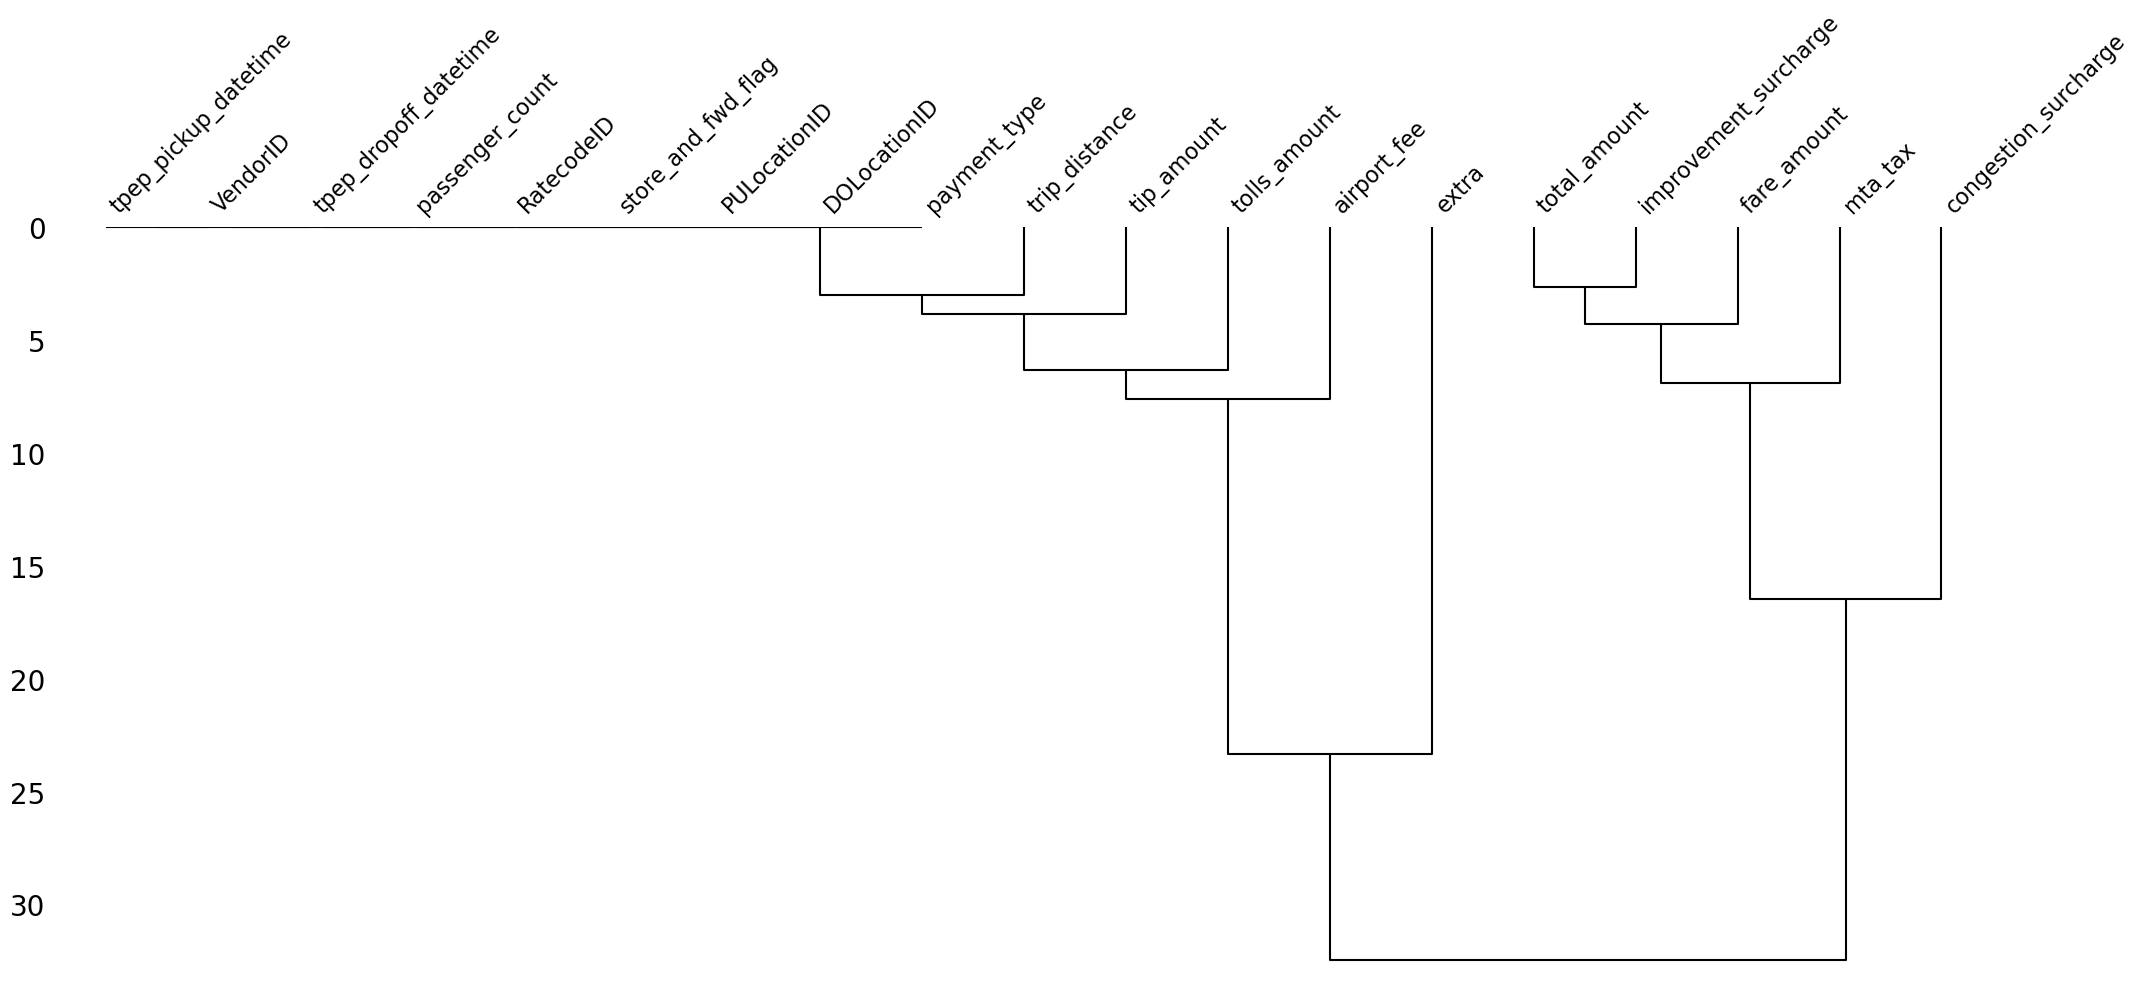

In [270]:
# Missingno dendogram 
msno.dendrogram(df2)
plt.savefig('../images/Msno Dendogram.png')

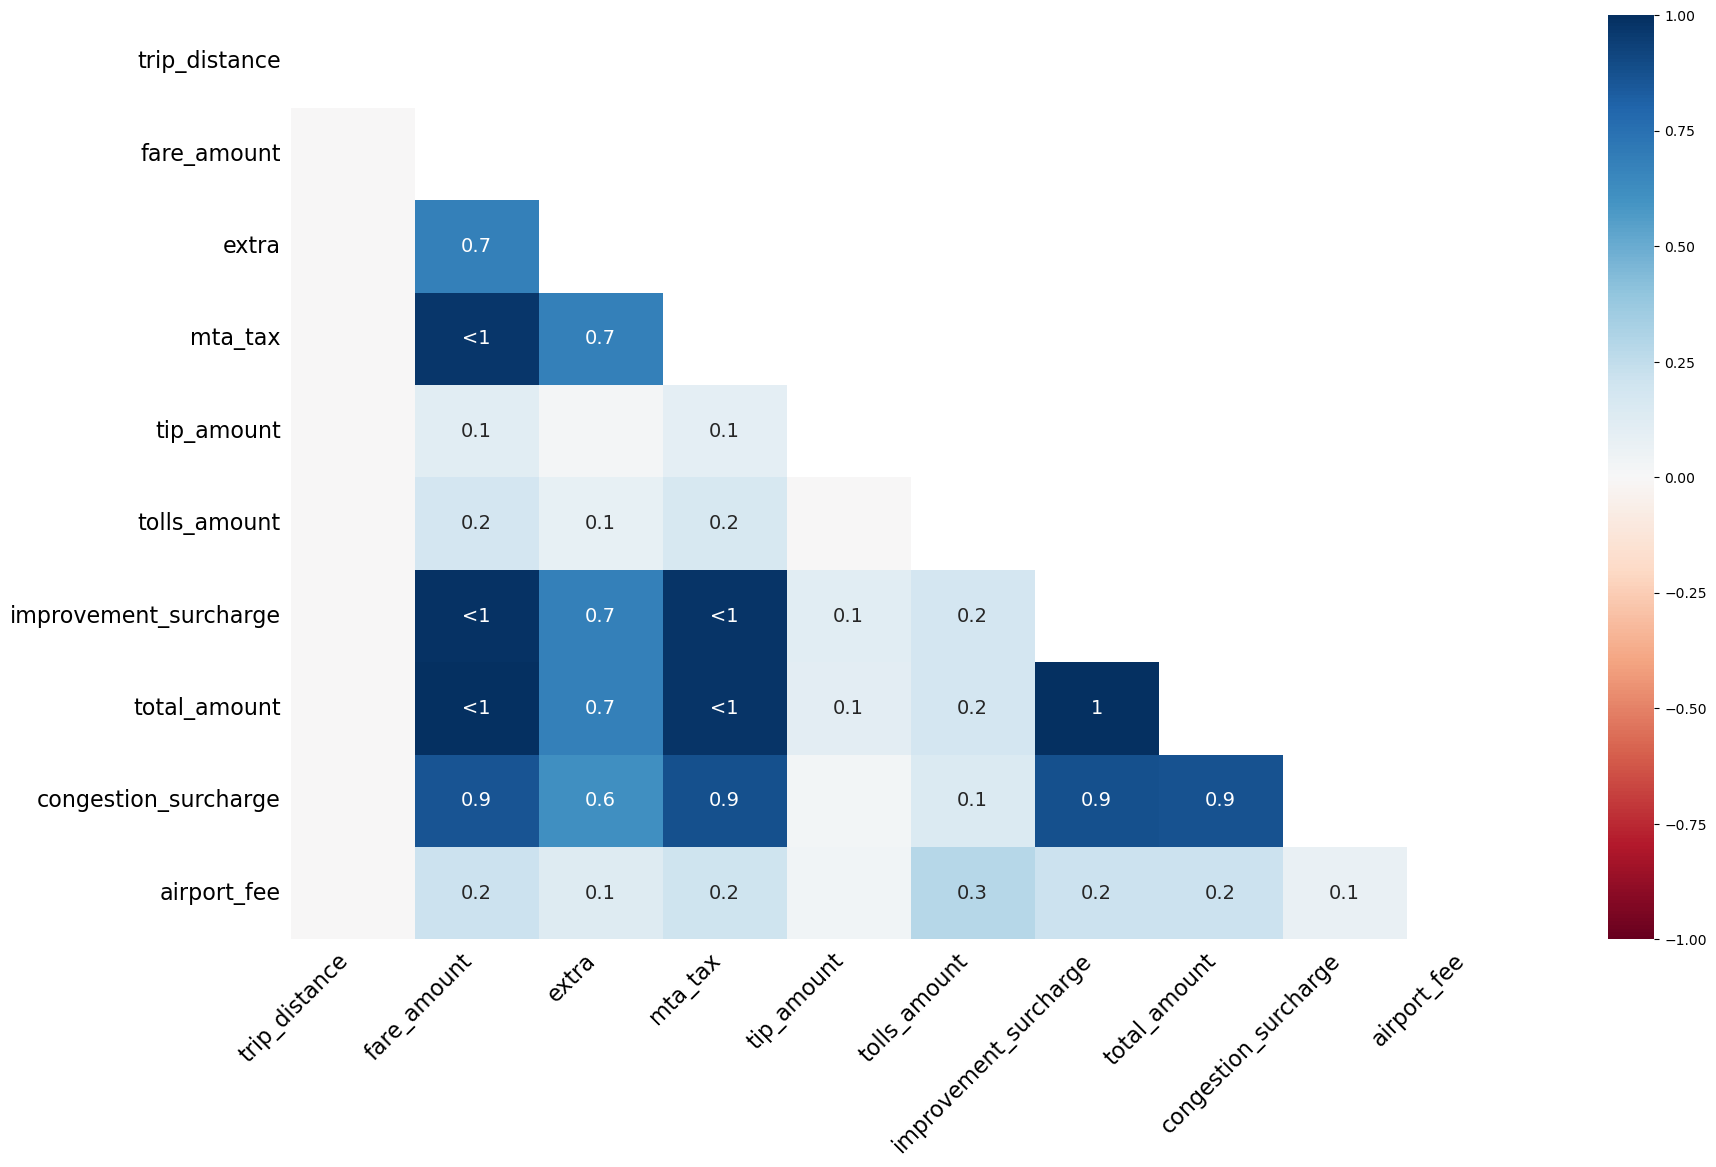

In [271]:
# Missingno heatmap
msno.heatmap(df2)
plt.savefig('../images/Msno Heatmap.png')

My analysis utilizing the missingno library reveals interesting correlations amongst the negative values in the dataset. The dendrogram plot, produced through hierarchical clustering, showcases two distinct clusters of attributes, implying a correlation amongst the negative values within these clusters.

1. In the first group, 'total_amount' and 'improvement_surcharge' intersect at level 3, 'fare_amount' joins at level 5, 'mta_tax' at level 8, and 'congestion_surcharge' at level 17. This clustering indicates that when a negative value appears in one of these columns, it is highly likely to appear in the others too.

2. The second group consists of 'trip_distance' and 'tip_amount' meeting at level 4, 'tolls_amount' at level 7, 'airport_fee' at level 9, and 'extra' joining the group at level 24. This again suggests strong correlations in the presence of negative values within this group of columns.

The two groups finally converge at level 32, implying a weaker yet still meaningful correlation between them as a whole.

The heatmap confirms the strong correlations among the variables identified within each cluster in the dendrogram. In the first group, attributes such as 'total_amount', 'improvement_surcharge', 'fare_amount', 'mta_tax', and 'congestion_surcharge' not only exhibit a hierarchical correlation but also a strong mutual correlation in their negative values. Eventhough there is a pattern observed within the second cluster in dendogram there is not a strong correlation between those values. These correlation coefficients back up our understanding of the potential relationships between these variables, highlighting the interconnected nature of these anomalies.

## Temporal Analysis
### Questions
1. How has the demand for taxi rides changed over time?
2. What are the peak hours for taxi rides during a day? Are there any trends noticeable during specific days of the week or months of the year?

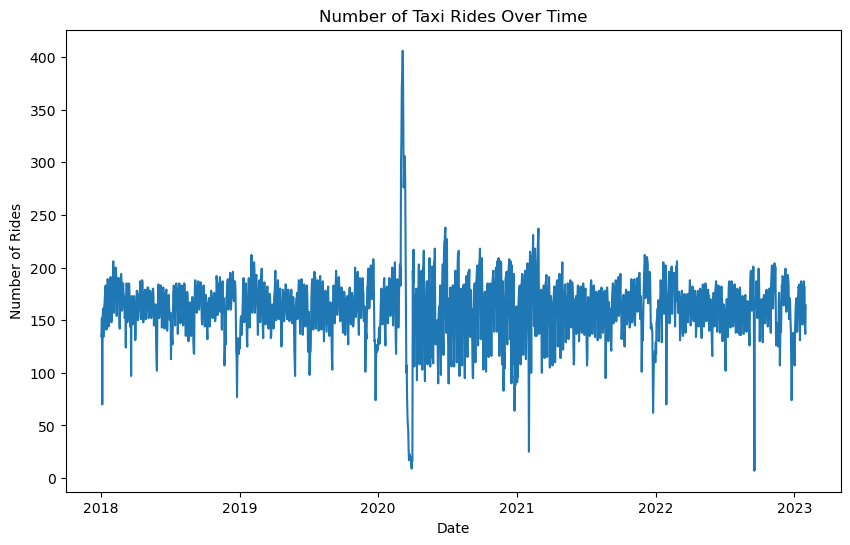

In [272]:
# First, we'll group by the date and count the number of rides per date.
ride_counts_by_date = df.groupby(df.tpep_pickup_datetime.dt.date).size()

# Now we plot the data
plt.figure(figsize=(10, 6))
ride_counts_by_date.plot(kind='line')
plt.title('Number of Taxi Rides Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.savefig('../images/Number of Taxi Rides Over Time.png')
plt.show()


"Number of Taxi Rides over Time" graph shows that the number of taxi rides does not exhibit a specific trend; instead, it resembles white noise, indicating a random pattern with no clear structure or predictability. However, a substantial deviation from this pattern is seen in March 2020, coinciding with the onset of the COVID-19 pandemic.

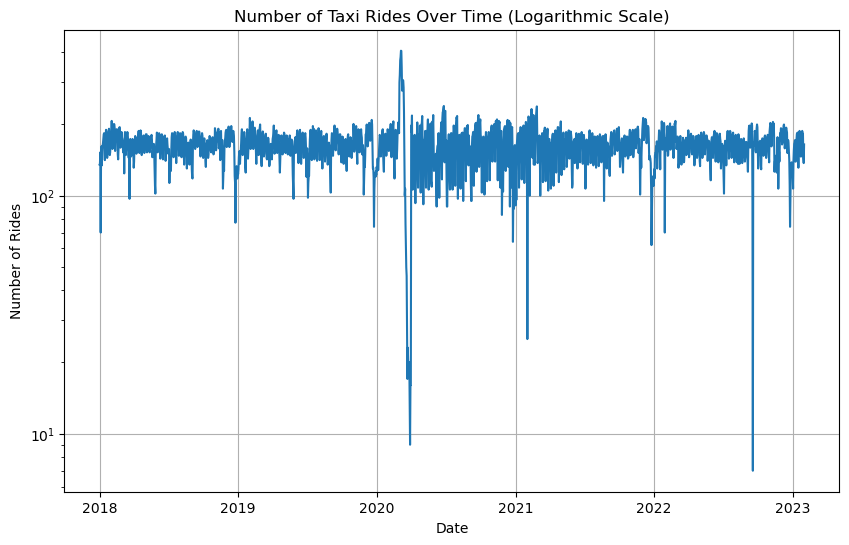

In [273]:
# First, we'll group by the date and count the number of rides per date.
ride_counts_by_date = df.groupby(df.tpep_pickup_datetime.dt.date).size()

# Now we plot the data
plt.figure(figsize=(10, 6))
plt.semilogy(ride_counts_by_date)
plt.title('Number of Taxi Rides Over Time (Logarithmic Scale)')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.savefig('../images/Number of Taxi Rides Over Time (Logarithmic Scale).png')
plt.show()


In analyzing the data, even after applying a logarithmic transformation, I observe significant random fluctuations that follow a similar pattern of white noise. One of the most striking features is the dramatic increase and decrease in taxi rides in March 2020, suggesting a reduction by an order of magnitude. This drop-off is most likely tied to the onset of the COVID-19 pandemic and its subsequent lockdown measures.

Post this significant dip, the white noise-like pattern resumes, but I notice several distinct anomalies. There is a discernible seasonal trend, with a significant drop in taxi rides around Christmas each year. This is likely reflective of reduced demand due to holiday closures and people choosing to stay home or travel out of town.

In addition to the Christmas dip, I observe three other significant drops. The first two occurred on 2021-02-01 and 2022-01-29, which coincide with periods when New York experienced severe storms. As extreme weather conditions have a considerable impact on road transport, it's reasonable to attribute the drop in taxi service demand to these events.

The third noticeable drop happened on 2022-09-17. My research reveals that on this date, several roads were closed due to the UN General Assembly. This international event would have led to traffic restrictions, thus explaining the sudden decrease in taxi rides.

Overall, the analysis suggests that both predictable seasonal trends and unexpected events significantly influence the demand for taxi services in New York City.

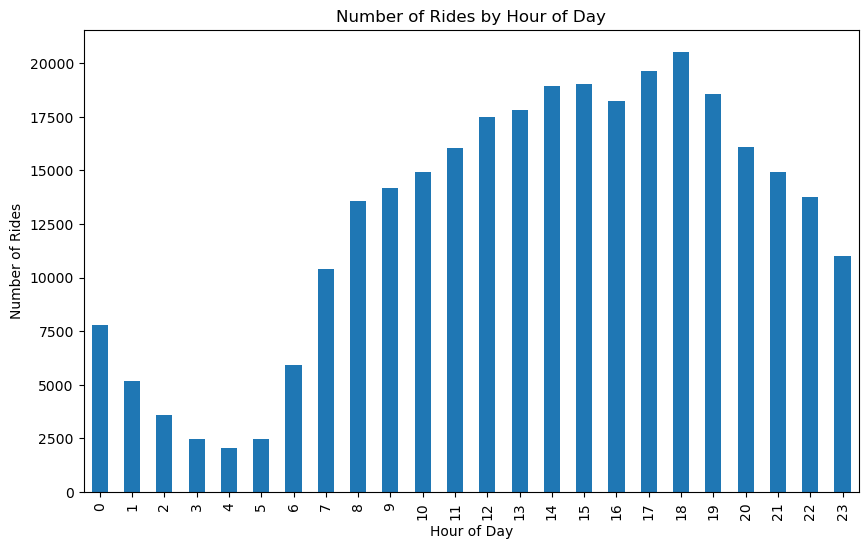

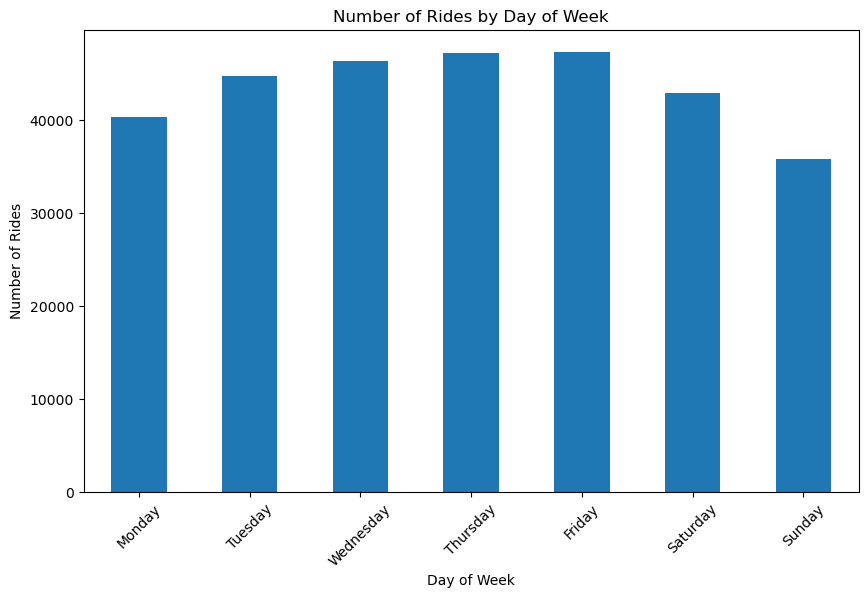

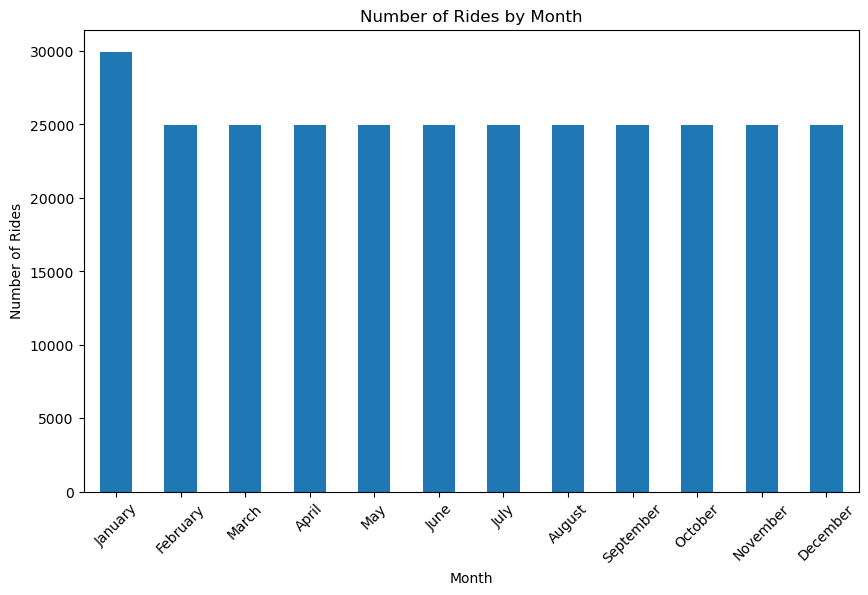

In [274]:
# For hour of the day
plt.figure(figsize=(10, 6))
df['pickup_hour'].value_counts(sort=False).plot(kind='bar')
plt.title('Number of Rides by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.savefig('../images/Number of Rides by Hour of Day.png')
plt.show()

# For day of the week
# Define the day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
df['pickup_day_of_week'].value_counts(sort=False).plot(kind='bar')
plt.title('Number of Rides by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.xticks(ticks=range(7), labels=day_names, rotation=45)  # Set custom tick labels
plt.savefig('../images/Number of Rides by Day of Week.png')
plt.show()

# For month of the year
# Define the month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
            'October','November', 'December']

plt.figure(figsize=(10, 6))
df['pickup_month'].value_counts(sort=False).plot(kind='bar')
plt.title('Number of Rides by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(ticks=range(12), labels=month_names, rotation=45)  # Set custom tick labels
plt.savefig('../images/Number of Rides by Day of Month.png')
plt.show()


#### Hourly Trends:
- The lowest taxi pickup numbers are observed during the early morning hours between 2-5 AM, with the absolute lowest at 4 AM which has 2,052 rides.
- The numbers start increasing from 5 AM, with a significant increase observed at 6 AM (5,937 rides), likely marking the start of morning commute hours.
- The highest demand is seen from 5 PM to 7 PM, with the absolute maximum at 6 PM (20,520 rides), which may be due to a combination of evening commute and early leisure activities.
- After the peak, a gradual decline is observed post 7 PM, with a more rapid decline after 10 PM, marking the end of typical leisure hours.

#### Weekly Trends:
- Taxi demand seems to follow a weekly pattern. The busiest days are mid-week, specifically Wednesday (46,339 rides) and Thursday (47,210 rides).
- The number of rides then start to decrease, with the lowest demand observed on Sunday (35,795 rides), which is likely due to lower commuting needs and activities during the weekend.

#### Monthly Trends:
- The demand for taxi rides appears to be fairly consistent throughout the year, with each month observing roughly 25,000 rides. This indicates a stable demand irrespective of the season, suggesting that external factors such as weather conditions have a minimal impact on taxi usage.

## Geographical Analysis
### Questions
1. What are the most popular pickup and drop-off locations?
2. Are there any specific routes that are more popular than others?

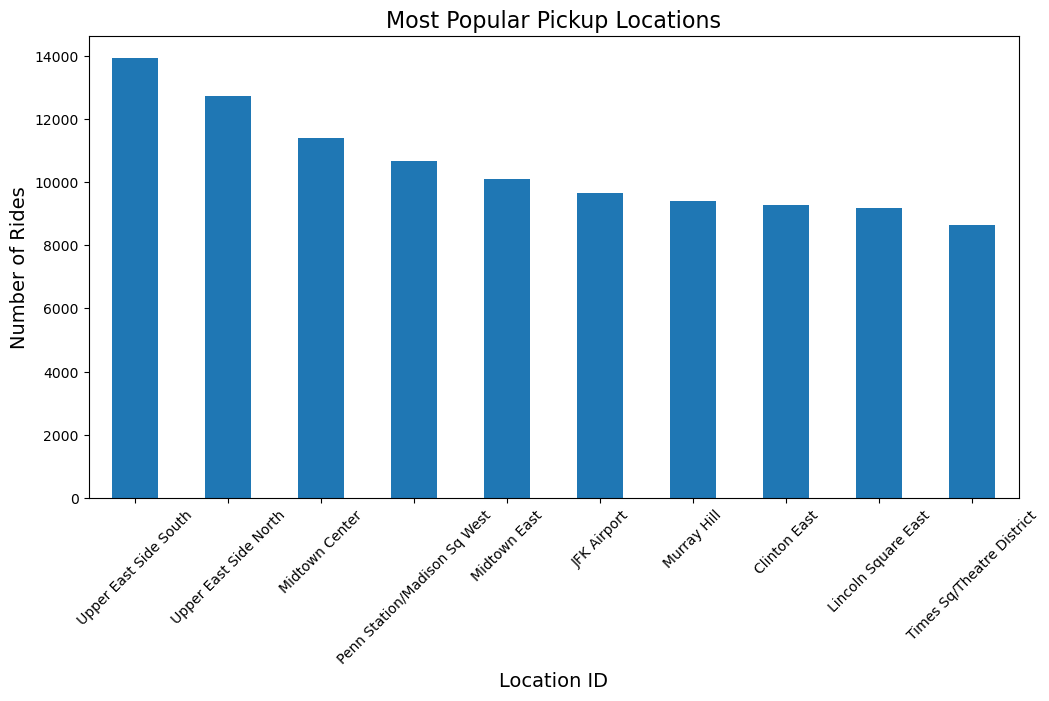

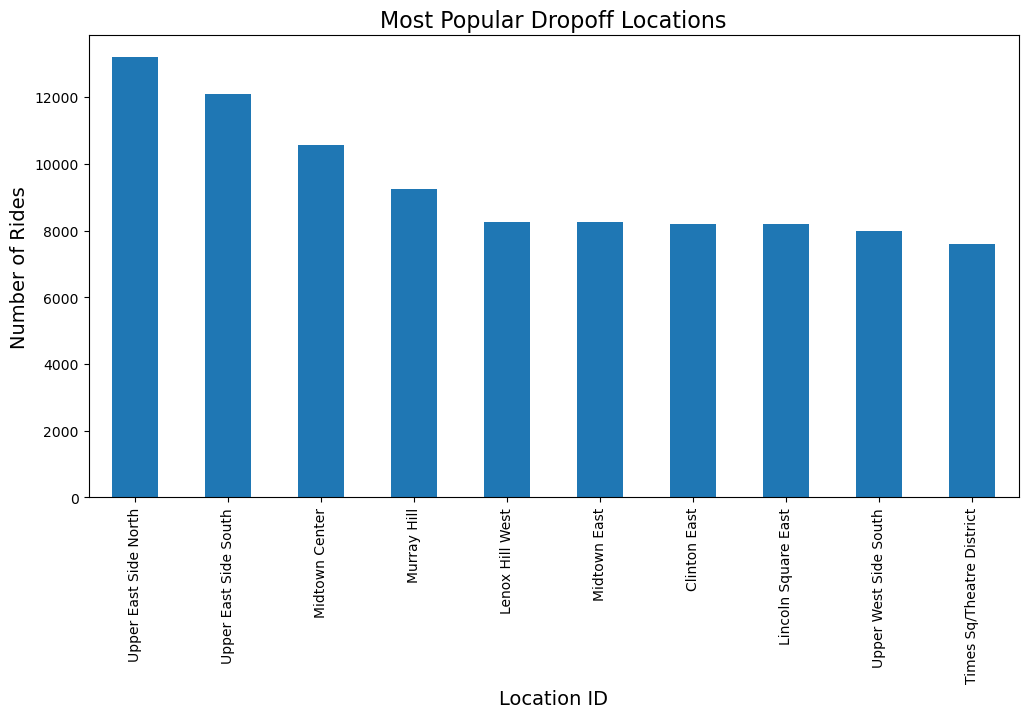

In [275]:
# Most popular pickup locations
pickup_locations = df['pickup_zone'].value_counts().head(10)

# Plot the most popular pickup locations
plt.figure(figsize=(12,6))
pickup_locations.plot(kind='bar')
plt.title('Most Popular Pickup Locations', fontsize=16)
plt.xlabel('Location ID', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(rotation=45)  # Set custom tick labels
plt.savefig('../images/Most Popular Pickup Locations.png')
plt.show()

# Most popular drop-off locations
dropoff_locations = df['dropoff_zone'].value_counts().head(10)

# Plot the most popular drop-off locations
plt.figure(figsize=(12,6))
dropoff_locations.plot(kind='bar')
plt.title('Most Popular Dropoff Locations', fontsize=16)
plt.xlabel('Location ID', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.savefig('../images/Most Popular Dropoff Locations.png')
plt.show()


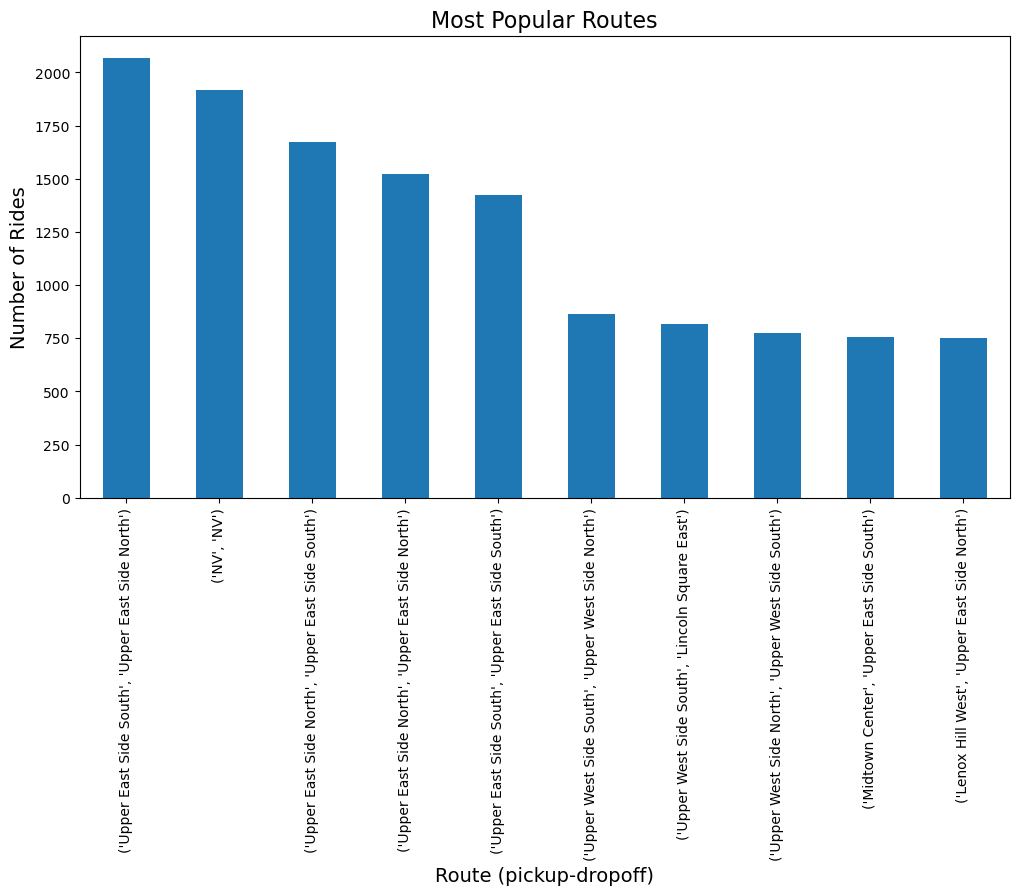

In [276]:
# Most popular routes
routes = df.groupby(['pickup_zone', 'dropoff_zone']).size().reset_index(name='counts')
routes_sorted = routes.sort_values('counts', ascending=False).head(10)

# Plot the most popular routes
plt.figure(figsize=(12,6))
routes_sorted['counts'].plot(kind='bar')
plt.title('Most Popular Routes', fontsize=16)
plt.xlabel('Route (pickup-dropoff)', fontsize=14)
plt.xticks(ticks=range(10), labels=list(zip(routes_sorted['pickup_zone'], routes_sorted['dropoff_zone'])))
plt.ylabel('Number of Rides', fontsize=14)
plt.savefig('../images/Most Popular Routes.png')
plt.show()


#### Pickup and Dropoff Zone Trends:
- The __Upper East Side__ (both South and North) appears to be the busiest zones for both pickups and dropoffs. This suggests that this zone is likely to be a residential or commercial hub that sees high levels of taxi usage.
- Other busy pickup zones include __Midtown Center, Penn Station/Madison Sq West, and Midtown East__. These are central locations that could indicate significant commercial activity or key transportation hubs.
- __JFK Airport__ ranks high in pickup zones but does not appear among the top 10 dropoff zones, suggesting a significant number of __outbound trips__ from the airport.
- Midtown Center, Murray Hill, and Clinton East are also busy for both pickups and dropoffs, indicating their popularity as both origins and destinations for rides.

#### Route Trends:
- The most popular route is between __Upper East Side South and Upper East Side North__ with 2,069 rides, suggesting significant intra-zone mobility. This may indicate that many people use taxis for short rides within this zone.
- Other top routes also include within-zone travel in __Upper East Side North, Upper East Side South, and Upper West Side South__, further emphasizing the popularity of intra-zone travel.
- Interestingly, __NV to NV__ has 1,918 rides, indicating that there might be some data irregularities or errors in capturing the zone information as NV stands for data not valid.

The popularity of routes within and between Upper East Side North and South indicates high taxi service demand in these areas. Understanding these patterns can help in better managing the taxi fleet distribution and in strategic decision-making for taxi services.

## Fare Analysis
### Questions
1. How has the average fare changed over time?
2. Is there a trend of fare variability based on the time of day, day of the week, or month?

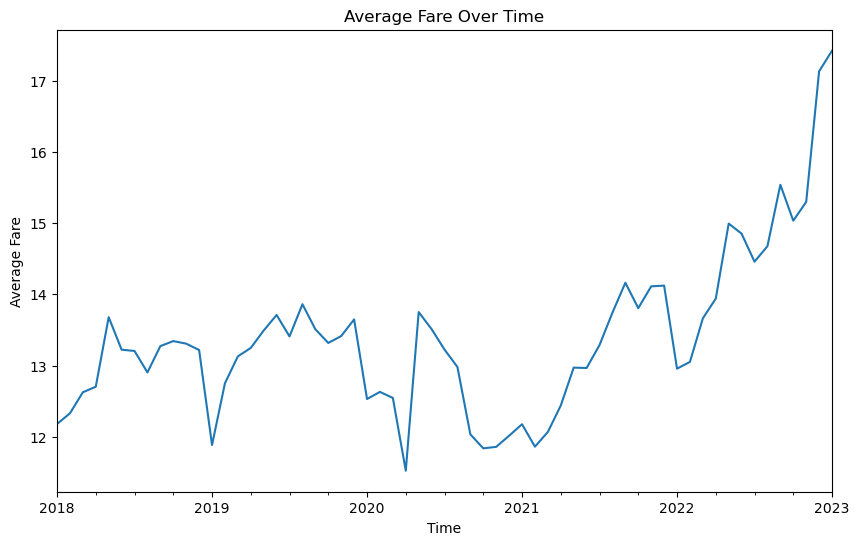

In [277]:
# Group by pickup datetime and calculate average fare
avg_fare_over_time = df.groupby(df['tpep_pickup_datetime'].dt.to_period("M"))['fare_amount'].mean()

# Plot the results
avg_fare_over_time.plot(kind='line', figsize=(10,6))
plt.title('Average Fare Over Time')
plt.xlabel('Time')
plt.ylabel('Average Fare')
plt.savefig('../images/Average Fare Over Time.png')
plt.show()


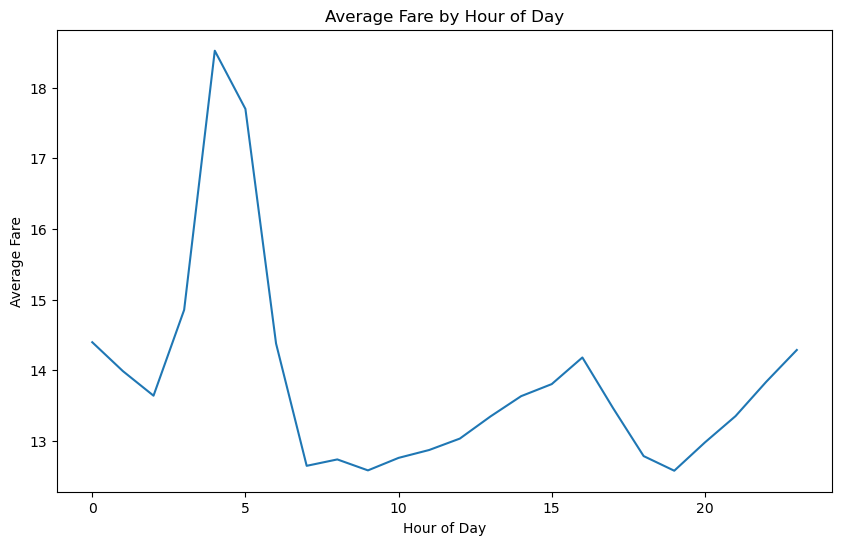

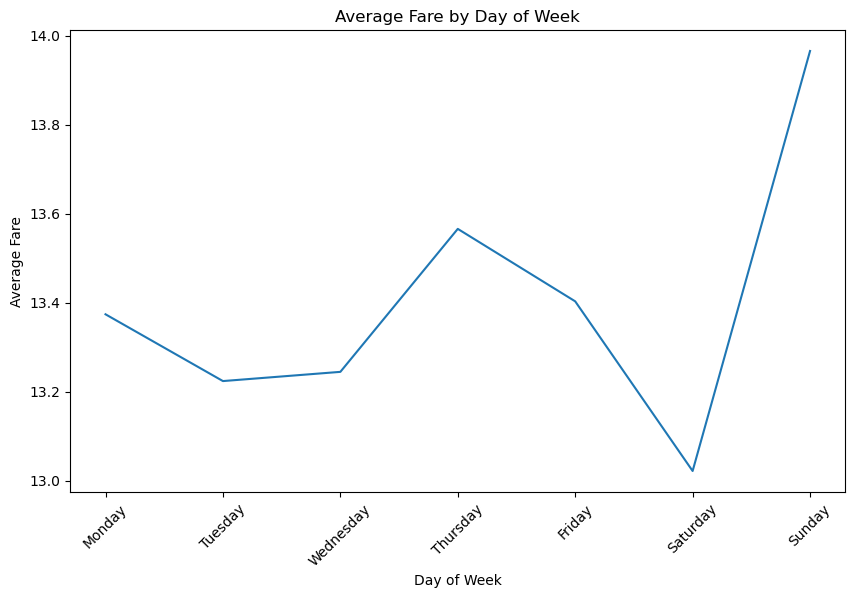

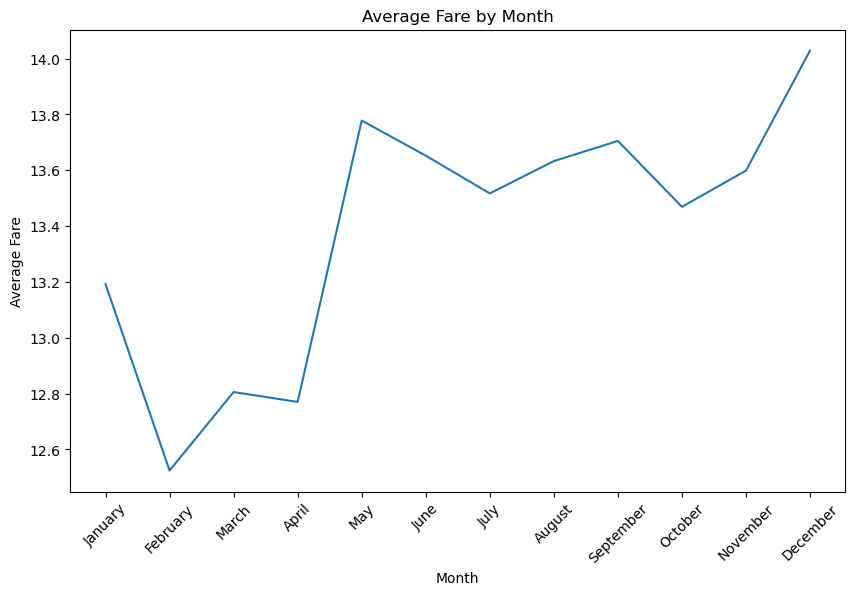

In [278]:
# Group by hour of day and calculate average fare
avg_fare_by_hour = df.groupby(df['pickup_hour'])['fare_amount'].mean()

ax = plt.axes()
# Plot the results
avg_fare_by_hour.plot(kind='line', figsize=(10,6))
plt.title('Average Fare by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare')
plt.savefig('../images/Average Fare by Hour of Day.png')
plt.show()

# Group by day of week and calculate average fare
avg_fare_by_day = df.groupby(df['pickup_day_of_week'])['fare_amount'].mean()

# Plot the results
avg_fare_by_day.plot(kind='line', figsize=(10,6))
plt.title('Average Fare by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare')
plt.xticks(ticks=range(7), labels=day_names, rotation = 45)
plt.savefig('../images/Average Fare by Day of Week.png')
plt.show()

# Group by month and calculate average fare
avg_fare_by_month = df.groupby(df['pickup_month'])['fare_amount'].mean()

# Plot the results
avg_fare_by_month.plot(kind='line', figsize=(10,6))
plt.title('Average Fare by Month')
plt.xlabel('Month')
plt.ylabel('Average Fare')
plt.xticks(ticks=range(12), labels=month_names, rotation = 45)
plt.savefig('../images/Average Fare by Month.png')
plt.show()


__Fare Analysis Over Time__

The average taxi fare shows an overall increasing trend over the period from 2018 to 2023. There are a few peaks and troughs within this time frame, indicating some degree of seasonality or response to specific events:

- A clear seasonality exists in taxi fares, with an annual rise-and-fall pattern. The average fare begins around 12.3 USD in January, peaking at around 14 USD, and drops back to around 12 USD by the year's end. This pattern repeats in 2019.
- 2020 sees a dip in average fare due to COVID-19's impact.
- From January 2021 to 2023, fares increase from about 12.3 USD to 18.5 USD, reflecting industry changes possibly due to recovery from the pandemic or increased operational costs or inflation.

__Average Fare by Hour__

The analysis reveals certain patterns in average fare across different hours of the day:

- The average fare amount varies across different hours of the day. The highest average fare is observed in the early morning hours at 4 AM (18.52 USD) and 5 AM (17.70 USD), possibly due to less traffic or fewer drivers available at these hours, thereby driving up the prices.
- The average fare starts decreasing from 6 AM, reaching its lowest during late morning and early afternoon hours (12.64 USD at 7 AM and 12.58 USD at 9 AM).
- Fares rise gradually in the evening, with higher averages observed from 4 PM onwards, peaking at 11 PM (14.29 USD).

__Average Fare by Day of Week__

The day of the week also seems to affect the average fare:

- Fares show some variation across the days of the week. Sunday sees the highest average fare (13.97 USD), possibly reflecting higher weekend or leisure travel rates.
- Thursday has the second highest average fare (13.57 USD), while the lowest average fare is observed on Saturday (13.02 USD).

__Average Fare by Month__

In terms of monthly trends:

- Fare amounts show variability across different months. The fares seem to be lowest at the beginning of the year (12.18 USD in January 2018 and 11.88 USD in January 2019).
- The fares reach their peak in December 2022 and January 2023 (17.14 USD and 17.42 USD respectively), possibly due to increased travel demand during holiday seasons and inflation.
- The monthly fare pattern also suggests a general upward trend over the years from 2018 to 2023, indicating the fares may be influenced by factors such as inflation, fuel cost increases, or other operational cost increments.

## Speed and efficiency
### Questions

1. Is there a trend in the average speed of trips?
2. Does the speed change based on the time of day or specific routes?

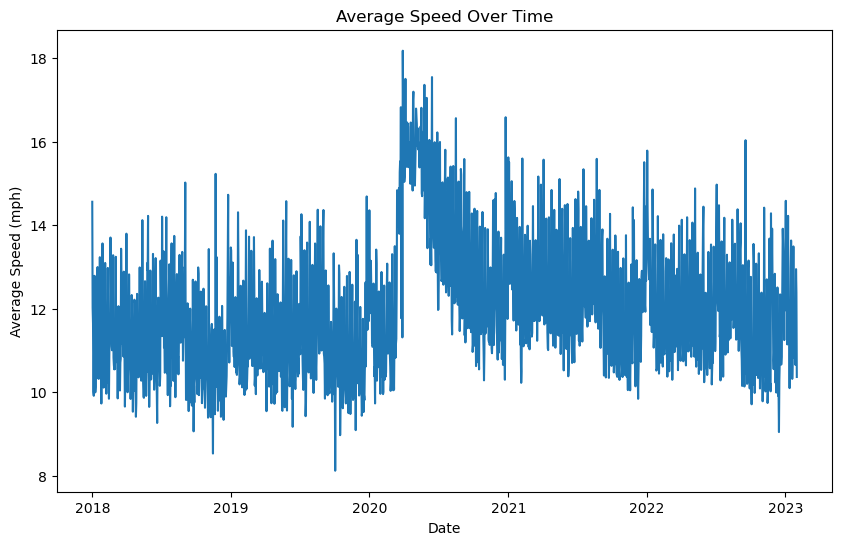

In [279]:
# Group by pickup date and calculate average speed
avg_speed_by_date = df.groupby(df['tpep_pickup_datetime'].dt.date)['average_speed_mph'].mean()

# Plot the results
avg_speed_by_date.plot(kind='line', figsize=(10,6))
plt.title('Average Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Average Speed (mph)')
plt.savefig('../images/Average Speed Over Time')
plt.show()

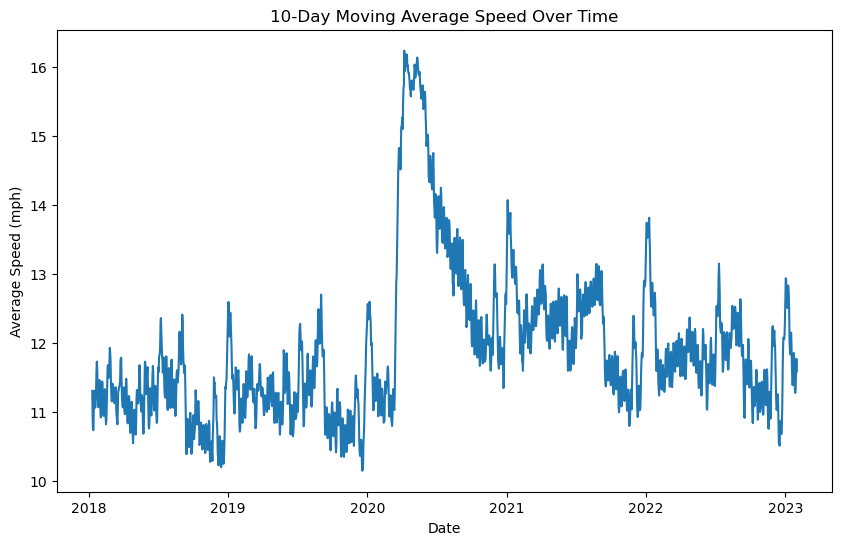

In [280]:
# Group by pickup date and calculate average speed
avg_speed_by_date = df.groupby(df['tpep_pickup_datetime'].dt.date)['average_speed_mph'].mean()

# Calculate the moving average over a 10 day window
avg_speed_by_date = avg_speed_by_date.rolling(window=10).mean()

# Plot the results
avg_speed_by_date.plot(kind='line', figsize=(10,6))
plt.title('10-Day Moving Average Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Average Speed (mph)')
plt.savefig('../images/10-Day Moving Average Speed Over Time.png')
plt.show()

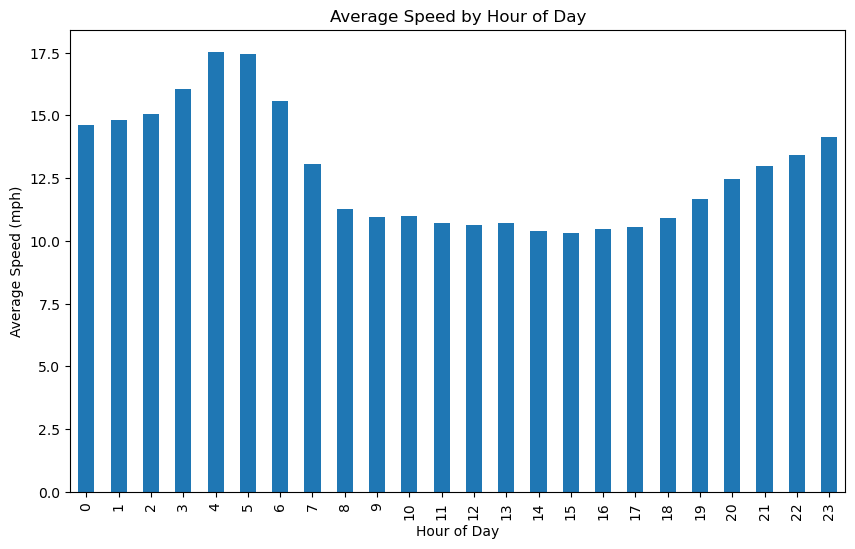

In [281]:
# Group by pickup hour and calculate average speed
avg_speed_by_hour = df.groupby(df['pickup_hour'])['average_speed_mph'].mean()

# Plot the results
avg_speed_by_hour.plot(kind='bar', figsize=(10,6))
plt.title('Average Speed by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Speed (mph)')
plt.savefig('../images/Average Speed by Hour of Day.png')
plt.show()


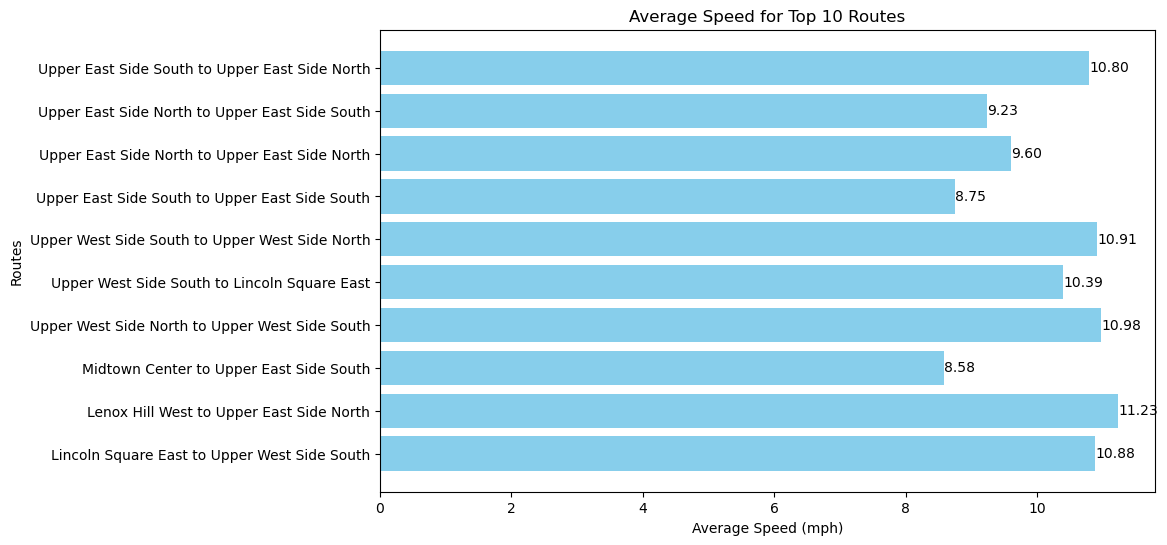

In [282]:
# Group by routes, calculate average speed and number of rides for each route
routes = df.groupby(['pickup_zone', 'dropoff_zone']).agg({'average_speed_mph':'mean', 'fare_amount':'count'}).reset_index()

# Filter out 'NV to NV' route
routes = routes[~((routes['pickup_zone'] == 'NV') & (routes['dropoff_zone'] == 'NV'))]

# Select the top 10 routes based on the number of rides
top_routes = routes.sort_values('fare_amount', ascending=False).head(10)

# Plot the average speed for the top 10 routes
plt.figure(figsize=(10,6))
bars = plt.barh(top_routes['pickup_zone'] + ' to ' + top_routes['dropoff_zone'], top_routes['average_speed_mph'], color='skyblue')
plt.xlabel('Average Speed (mph)')
plt.ylabel('Routes')
plt.title('Average Speed for Top 10 Routes')

# Loop over the bars and add data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', 
             va='center', ha='left')

plt.gca().invert_yaxis()  # reverse the order of routes
plt.savefig('../images/Average Speed for Top 10 Routes.png')
plt.show()


In [283]:
# Group by routes, calculate average speed and number of rides for each route
routes = df.groupby(['pickup_zone', 'dropoff_zone']).agg({'average_speed_mph':'mean', 'fare_amount':'count'}).reset_index()

# Filter out 'NV to NV' route
routes = routes[~((routes['pickup_zone'] == 'NV') & (routes['dropoff_zone'] == 'NV'))]

# Select the top 10 routes based on the number of rides
top_routes = routes.sort_values('fare_amount', ascending=False).head(10)
top_routes

,pickup_zone,dropoff_zone,average_speed_mph,fare_amount
12111,Upper East Side South,Upper East Side North,10.80,2069
11953,Upper East Side North,Upper East Side South,9.23,1673
11952,Upper East Side North,Upper East Side North,9.60,1524
12112,Upper East Side South,Upper East Side South,8.75,1422
12381,Upper West Side South,Upper West Side North,10.91,863
12332,Upper West Side South,Lincoln Square East,10.39,817
12248,Upper West Side North,Upper West Side South,10.98,773
8027,Midtown Center,Upper East Side South,8.58,756
6737,Lenox Hill West,Upper East Side North,11.23,752
6884,Lincoln Square East,Upper West Side South,10.88,745


- __Speed Trends Over Time:__ Before the Covid-19 pandemic, the average speed was higher during the first 8 months of the year and lower in the last 4 months, for both 2018 and 2019. This may be related to increased holiday traffic towards the end of the year. However, with the onset of the Covid-19 pandemic, the average speed increased significantly, likely due to reduced traffic on the roads. After a peak, speeds slowly decreased again towards the end of the year, reflecting a similar pattern to pre-pandemic times, but at a higher average speed.
- __Hourly Speed Trends:__ The data reveals an intriguing pattern: average speed tends to be the highest during the early morning hours (from 4 am to 5 am) when the roads are typically less congested. As morning traffic increases, average speeds start to drop, reaching their lowest around 3 pm. Speeds then gradually increase again towards the evening and into the night, likely due to reduced traffic.
- __Speed by Route:__ The average speed also varies based on specific routes. For instance, the route from "Upper East Side South to Upper East Side North" has an average speed of 10.80 mph, while the routes from "Upper East Side North to Upper East Side South" and from "Midtown Center to Upper East Side South" have average speed of 9.23 mph and 8.58 respectively. This could indicate traffic congestion or longer waits at traffic lights in these areas.

## Passenger trends
### Questions

1. Is there a trend in the number of passengers per trip?
2. Do the number of passengers impact fare or tip amount?

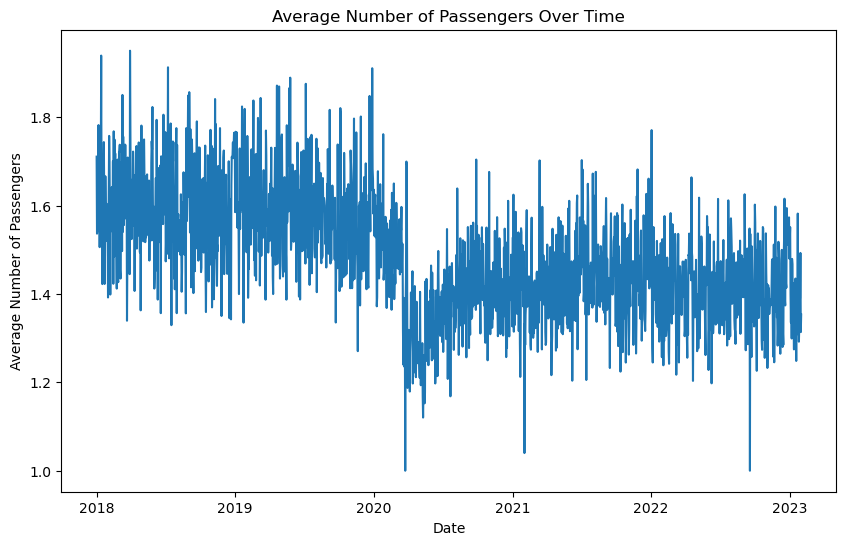

In [284]:
# Group by pickup date and calculate average passenger count
avg_passenger_by_date = df.groupby(df['tpep_pickup_datetime'].dt.date)['passenger_count'].mean()

# Plot the results
avg_passenger_by_date.plot(kind='line', figsize=(10,6))
plt.title('Average Number of Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Average Number of Passengers')
plt.savefig('../images/Average Number of Passengers Over Time.png')
plt.show()


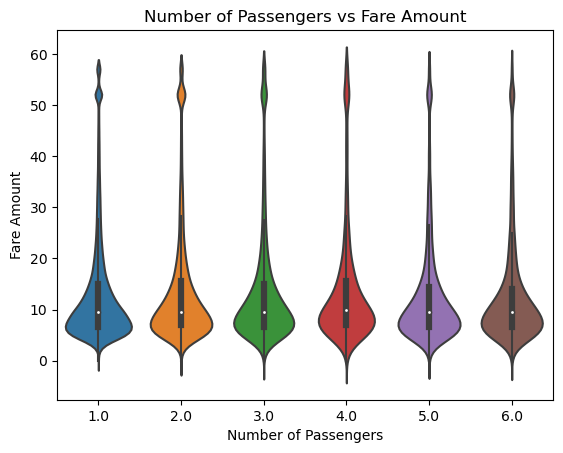

In [285]:
# Scatter plot of passenger count vs fare amount
sns.violinplot(x='passenger_count', y='fare_amount', data = df)
plt.title('Number of Passengers vs Fare Amount')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.savefig('../images/Number of Passengers vs Fare Amount.png')
plt.show()


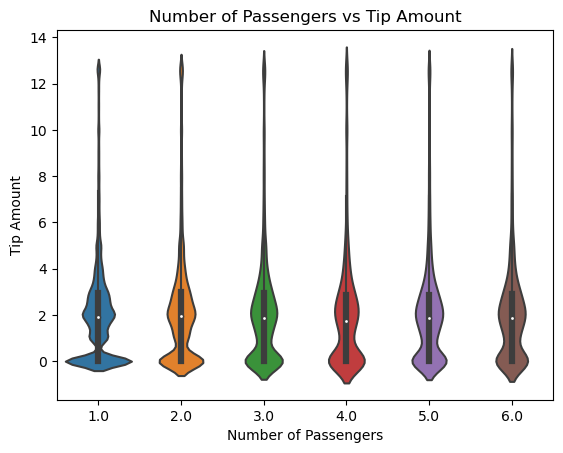

In [286]:
# Scatter plot of passenger count vs tip amount
sns.violinplot(x="passenger_count", y="tip_amount", data=df)
plt.title('Number of Passengers vs Tip Amount')
plt.xlabel('Number of Passengers')
plt.ylabel('Tip Amount')
plt.savefig('../images/Number of Passengers vs Tip Amount.png')
plt.show()


__Passenger Trend Analysis Over Time__

- __Average Passenger Count Over Time:__ Before the pandemic, the average passenger count fluctuated around 1.6, showing minor variations within the range of 1.4 to 1.8. The COVID-19 pandemic resulted in a substantial decrease in average passenger count, dropping to 1.0, likely due to social distancing restrictions and reduced overall mobility. In the post-pandemic phase, there has been a slow recovery with the average passenger count increasing up to about 1.4.

- __Passenger Count vs Fare Amount:__ Firstly, the relationship between 'passenger_count' and 'fare_amount' indicates that the means and the interquartile range (IQR) are virtually identical for all passenger counts from 1 to 6. This implies that regardless of the number of passengers, the distribution of fare amounts tends to follow a similar pattern. There is equal probability of observing a particular fare amount within the IQR across different passenger counts.

- __Passenger Count vs Tip Amount:__ Secondly, the analysis of 'passenger_count' vs 'tip_amount' also presents a similar trend with respect to the means and the IQR. The distributions are consistent across different passenger counts. However, there is a notable difference for single-passenger rides. For passenger count one, the probability distribution widens at a tip amount of 0. This suggests that single-passenger trips have a higher likelihood of resulting in no tip compared to trips with more passengers.

## Airport trips
### Questions


1. What percentage of trips are to/from the airport and how has this changed over time?
2. Are there any specific trends noticeable in airport trips in terms of fare, tips, or duration?

Percentage of airport trips: 4.25%


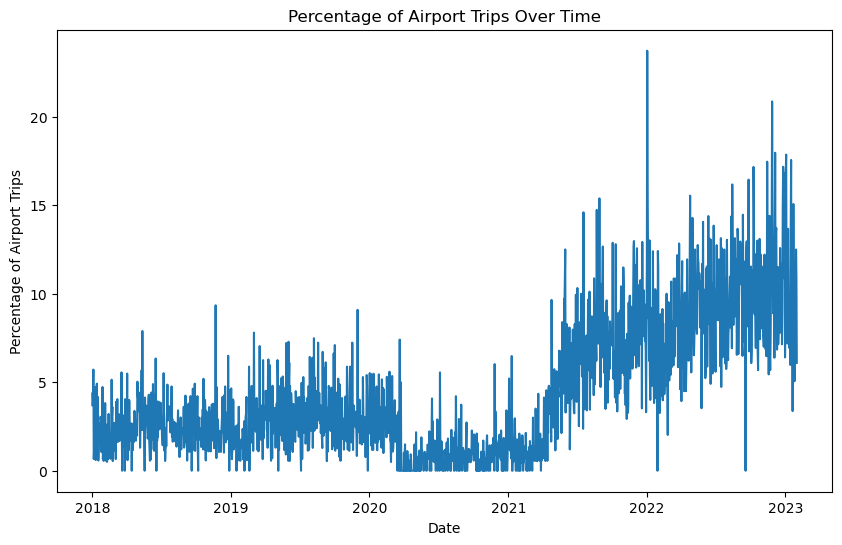

In [287]:
# Calculate total trips and total airport trips
total_trips = df.shape[0]
total_airport_trips = df['is_airport'].sum()

# Calculate percentage of airport trips
percentage_airport_trips = round((total_airport_trips / total_trips) * 100,2)
print(f"Percentage of airport trips: {percentage_airport_trips}%")

# Group by pickup date and calculate percentage of airport trips for each day
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
df_airport_by_date = df.groupby('pickup_date')['is_airport'].sum() / df.groupby('pickup_date')['is_airport'].count() * 100

# Plot the results
df_airport_by_date.plot(kind='line', figsize=(10,6))
plt.title('Percentage of Airport Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage of Airport Trips')
plt.savefig('../images/Percentage of Airport Trips Over Time.png')
plt.show()


In [288]:
df[['fare_amount', 'tip_amount', 'trip_duration']].describe()

,fare_amount,tip_amount,trip_duration
count,304578.00,304578.00,304578.00
mean,13.39,2.18,14.18
std,11.18,2.45,11.20
min,0.00,0.00,0.02
25%,6.50,0.00,6.62
50%,9.50,1.88,11.03
75%,15.00,2.95,18.07
max,57.00,12.65,61.13


In [289]:
df.fare_amount.mean()

13.386160195417922

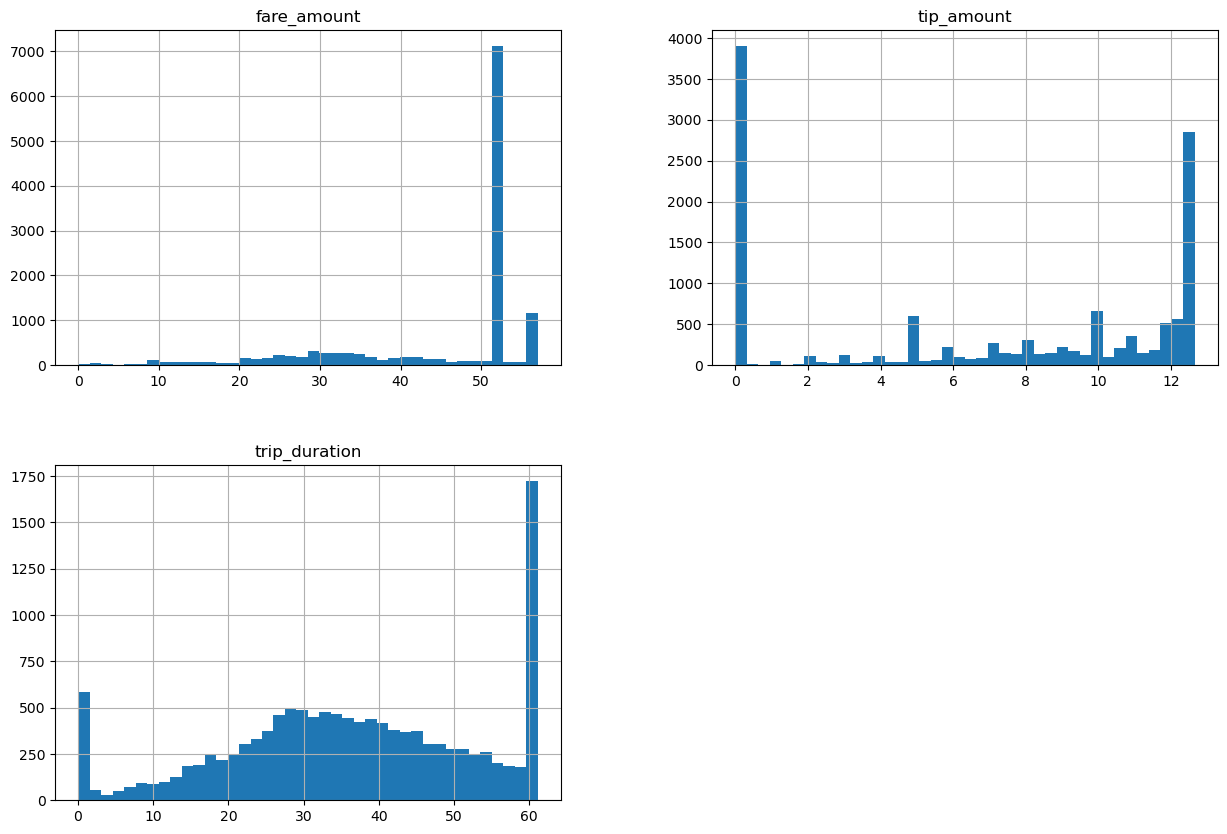

In [290]:
# Filter data for airport trips
df_airport = df[df['is_airport']]

# Plot histograms
df_airport[['fare_amount', 'tip_amount', 'trip_duration']].hist(bins=40, figsize=(15, 10))
plt.savefig('../images/Is airport trips.png')
plt.show()


A thorough examination of airport trips as a part of overall taxi service usage provides crucial insights that can enhance service planning and revenue maximization.

__Percentage of Airport Trips:__ Airport trips account for around 4.25% of all taxi trips. Between January 2018 and March 2020, the percentage of airport trips fluctuated around an average of 3%, with a white noise variation. This period was followed by a significant drop in the proportion of airport trips, which fell to an average of around 1% from March 2020 to March 2021, coinciding with the onset of the COVID-19 pandemic. However, there was a marked uptick in airport trips from March 2021 to January 2023, reaching an average of 10%. This resurgence indicates a recovery of air travel and the associated demand for airport taxi services in the post-pandemic period.

__Fare Amount:__ The fare amount for airport trips follows a somewhat normal distribution, albeit with a noteworthy outlier at a fare of 52 USD, which registers over 7000 value counts. This might be indicative of a standard flat-rate fare for airport trips, causing this peak. The average fare amount for airport trips is approximately 13.39 USD.

__Tip Amount:__ The distribution of the tip amount for airport trips is left-skewed, indicating that a majority of trips garner smaller tips. Interestingly, there is a significant density at both ends of the spectrum, with a large number of tips close to 0 and a peak at around 13 USD, pointing towards variability in tipping behaviors among passengers.

__Trip Duration:__ The trip duration for airport trips is normally distributed, ranging from 0 to approximately 61 minutes, with the average trip lasting for about 14.18 minutes. However, there is a considerable density at both extremes, particularly at the 61-minute mark, which sees the highest value counts. This could be indicative of longer trip durations due to factors like traffic congestion, distance to the airport, or other delays.

Payment method trends:

What are the trends in the use of different payment methods?
Is there a correlation between the payment method and the tip amount or percentage?

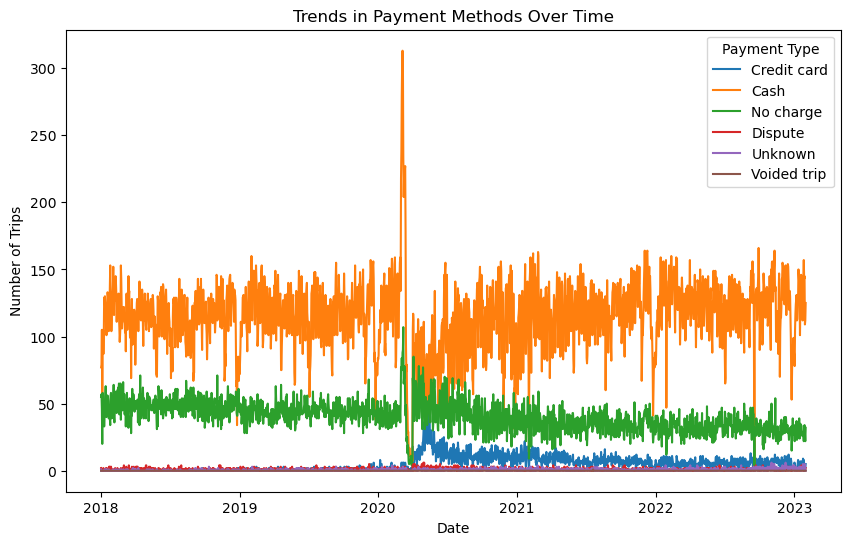

In [291]:
# Define the payment type dictionary
payment_dict = {0: 'Credit card', 1: 'Cash', 2: 'No charge', 3: 'Dispute', 4: 'Unknown', 5: 'Voided trip'}

# Group by payment_type and count instances
payment_trends = df.groupby(['pickup_date', 'payment_type']).size().unstack()

# Plot the results
ax = payment_trends.plot(kind='line', figsize=(10, 6))

# Modify the legend labels
handles, labels = ax.get_legend_handles_labels()
new_labels = [payment_dict[int(label)] if int(label) in payment_dict else label for label in labels]
ax.legend(handles, new_labels, title='Payment Type')

# Set plot title and axis labels
plt.title('Trends in Payment Methods Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.savefig('../images/Trends in Payment Methods Over Time.png')
plt.show()

In [292]:
# Calculate average tip amount and percentage for each payment type
avg_tip_by_payment_type = df.groupby('payment_type')['tip_amount'].mean()
avg_tip_pct_by_payment_type = df.groupby('payment_type')['tip_percentage'].mean()

# Rename the columns
avg_tip_by_payment_type = avg_tip_by_payment_type.rename(payment_dict)
avg_tip_pct_by_payment_type = avg_tip_pct_by_payment_type.rename(payment_dict)

# Print the results
print("Average Tip Amount by Payment Type:")
print(avg_tip_by_payment_type)
print("\nAverage Tip Percentage by Payment Type:")
print(avg_tip_pct_by_payment_type)


Average Tip Amount by Payment Type:
payment_type
Credit card   2.25
Cash          2.97
No charge     0.00
Dispute       0.02
Unknown       0.06
Voided trip   0.00
Name: tip_amount, dtype: float64

Average Tip Percentage by Payment Type:
payment_type
Credit card   12.25
Cash          24.26
No charge      0.00
Dispute        0.19
Unknown        0.34
Voided trip    0.00
Name: tip_percentage, dtype: float64


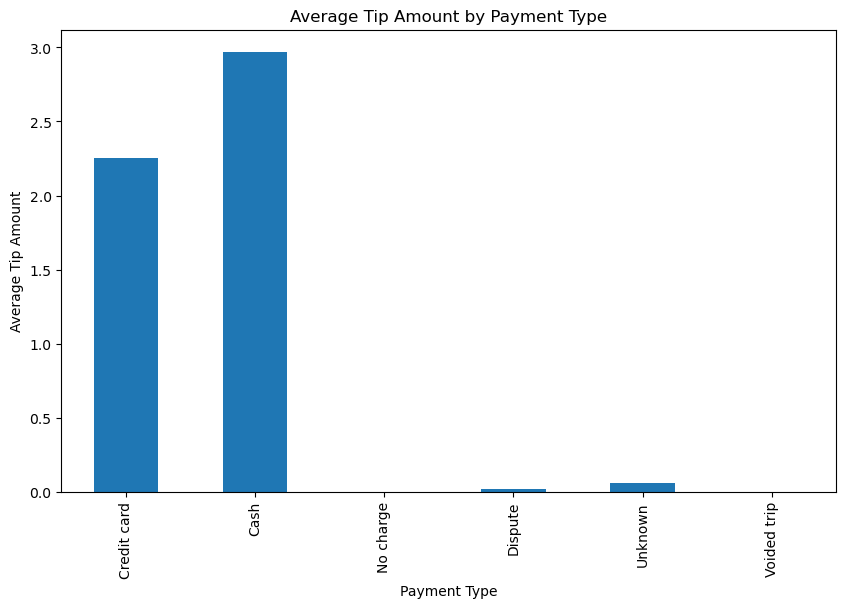

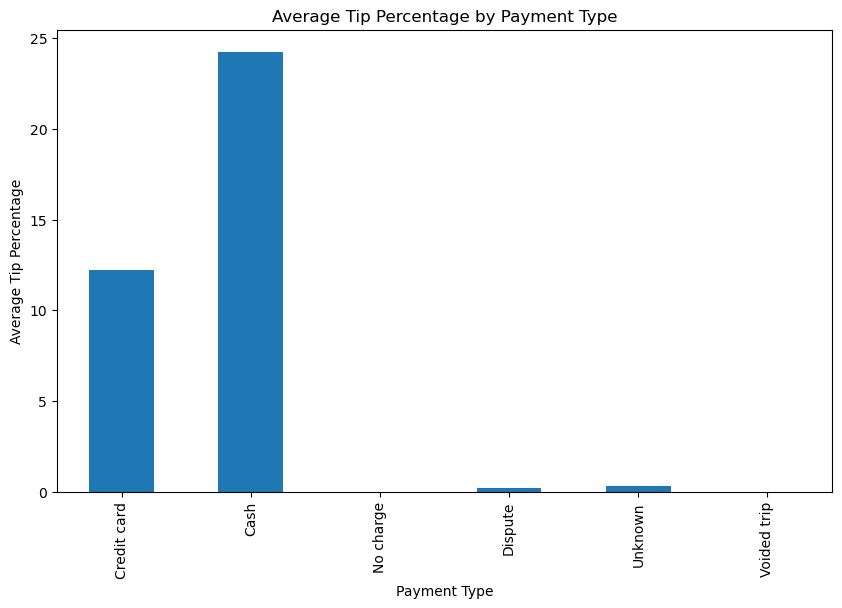

In [293]:
# Plot average tip amount by payment type
avg_tip_by_payment_type.plot(kind='bar', figsize=(10,6))
plt.title('Average Tip Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Tip Amount')
plt.show()

# Plot average tip percentage by payment type
avg_tip_pct_by_payment_type.plot(kind='bar', figsize=(10,6))
plt.title('Average Tip Percentage by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Tip Percentage')
plt.savefig('../images/Average Tip Percentage by Payment Type.png')
plt.show()


Understanding the trends in payment methods and their relation to tip amounts offers vital insights into customer behavior and can help inform business strategies for taxi services.

- __Payment Method Usage:__ The primary method of payment for taxi rides seems to be cash, followed by a "no charge" category. This unusual second-place category could be due to payments made through ride-hailing apps like Uber or Lyft, which are processed off the traditional meter system. Credit card payments also make a notable portion of the transactions. It's important to note that during the onset of the COVID-19 pandemic, there was a significant spike in cash and "no charge" transactions, followed by a sharp decline. This might indicate a temporary suspension of services or a shift in payment behavior due to health concerns. Credit card payments noticeably increase during this period, likely due to the contactless nature of such transactions, thus being perceived as safer during the pandemic.

- __Correlation between Payment Method and Tip:__ There appears to be a notable correlation between payment methods and the amount and percentage of tips received. Not surprisingly, the "no charge" and "voided trip" categories record no tips. On average, cash payments tend to have the highest tip amounts (2.97 USD), followed by credit card payments (2.25 USD). However, when considering tip as a percentage of the total fare, cash payments yield a higher tip percentage (24.26%) compared to credit card payments (12.25%).

# Conclusion and Management Summary
## Negative Value Correlation
The existence of a strong correlation between negative values across particular variables indicates a systematic issue within the data recording, processing, or calculation mechanisms. This alignment of findings across the dendrogram and heatmap urges an immediate examination of the concerned areas.

- The first group, including 'total_amount', 'improvement_surcharge', 'fare_amount', 'mta_tax', and 'congestion_surcharge', signals potential discrepancies in financial transactions. Whether it be due to malfunctioning devices, faulty software, or misrepresentation of refunds or adjustments, the management should initiate a thorough review of the process.

- The second group, encapsulating 'trip_distance', 'tip_amount', 'tolls_amount', 'airport_fee', and 'extra', suggests inconsistencies within distance or fee calculations. Errors within the GPS system, meter malfunctions, or incorrect manual entries should be investigated.

A collaborative approach involving the relevant departments should be considered to tackle these issues, along with the implementation of data validation checks to curb the inclusion of anomalous values in the future. Doing so will significantly enhance the accuracy and reliability of the data, thereby empowering more robust analyses and business insights.


## Temporal Trends

My comprehensive analysis of taxi pickups over different time intervals provides important insights into service utilization patterns. These findings have several implications for operational efficiency, service delivery, and strategic planning.

- __Time of Day:__ Understanding that taxi pickups are lowest in the early hours of the morning (2-5 AM), and highest during evening commute and leisure hours (5-7 PM), can help taxi services optimize their operations. This can be done by scheduling fewer cars during the early morning hours, and increasing the availability during peak hours.

- __Day of Week:__ The busiest days for taxi pickups are mid-week, with numbers gradually decreasing towards the weekend, and the lowest numbers observed on Sundays. This information could be used to inform the weekly scheduling of drivers, allocating more drivers during the mid-week and less on Sundays.

- __Month of Year:__ With the demand remaining steady throughout the year, taxi services can anticipate a consistent demand and plan their operations accordingly. This predictability helps in efficient resource management and operational planning.

In conclusion, leveraging these temporal patterns in taxi service demand can significantly aid in streamlining operations. By aligning resources with demand fluctuations, taxi services can potentially reduce operational costs, improve customer service, and maximize overall business performance.

## Geographical Trends
My analysis of taxi trip data reveals insightful geographical trends that can aid in strategic decision-making for taxi service providers:

- __Pickup and Dropoff Zones:__ Recognizing that the Upper East Side (both South and North) is the busiest zone for both pickups and dropoffs can guide taxi services to maintain a sufficient supply of taxis in these areas to meet the high demand. This can lead to reduced wait times and increased customer satisfaction.
- __Airport Pickups:__ Understanding that JFK Airport is a major pickup point but not a common dropoff location can inform taxi services to schedule more pickups from the airport. Additionally, they can explore opportunities for return trips to the airport to increase efficiency.
- __Route Analysis:__ The popularity of certain routes, especially within the same zone (Upper East Side and Upper West Side), suggests that taxi services could consider offering specialized services, such as discounted short-distance travel within these zones.
- __Data Cleaning:__ The NV to NV route needs further investigation and potential data cleaning to ensure that insights and predictions based on this data are accurate.

In conclusion, these location-based patterns can help taxi services optimize their location management, route planning, and resource allocation. By understanding and responding to these patterns, taxi services can enhance their service efficiency, reduce operational costs, and improve customer satisfaction.

## Fare Analysis
My analysis of taxi fare data reveals several key insights that can help taxi service providers to understand fare trends and potentially optimize their pricing strategies:

- __Fare Increases Over Time:__ The data suggests an overall increasing trend in average taxi fares over the past few years. This could be due to a variety of factors, such as increased operating costs or changes in demand. It will be important to continue monitoring these trends to make informed pricing decisions.

- __Time of Day Impact:__ Understanding the higher fares in the early morning hours and late at night could be useful for planning driver schedules and fare policies to maximize revenue. Offering dynamic pricing or discounts during off-peak hours might attract more ridership.

- __Weekly Fare Trends:__ The higher fares on Sundays and Mondays could be an opportunity to offer weekend specials or discounted rates to increase ridership on these days. On the other hand, lower fares on Saturdays might be a signal to review pricing strategies for this day to optimize revenues.

- __Monthly Fare Trends:__ The data also shows monthly trends, from May and onwards having the highest average fares and February the lowest. These patterns may be related to post covid environment due to lack of data, and increasing trend on the inflation.

Understanding these trends can help taxi service providers enhance their pricing strategies, improve their services, and maximize their profitability.

## Speed & Efficiency

The analysis of the average speed of taxi trips offers crucial insights regarding how service speeds vary over time, across different hours of the day, and for specific routes:

- __Time-based Speed Trends:__ In the pre-COVID-19 years of 2018 and 2019, average speeds were higher in the first 8 months of the year and dipped during the last 4 months. However, when the pandemic started in 2020, average speeds jumped from around 11 mph to approximately 16 mph due to reduced traffic on the roads. Despite a slight decrease towards the end of 2020, speeds remained above pre-pandemic levels, suggesting a lasting impact of COVID-19 on traffic conditions and taxi service speed.

- __Hourly Speed Patterns:__ Average taxi speeds vary significantly throughout the day. Speeds are highest in the early morning hours from 2:00-5:00 AM when traffic is typically lightest. They then decrease during the morning rush hour, reaching their lowest point from 10:00 AM to 3:00 PM. After this, speeds gradually increase through the evening and night, demonstrating the impact of daily traffic patterns on taxi speeds.

- __Route-based Speed Variations:__ The analysis of the top 10 taxi routes, based on the number of rides, revealed differences in average speeds. The fastest route among these is between Lenox Hill West and Upper East Side North, with an average speed of 11.23 mph. In contrast, the slowest is within Upper East Side South at 8.58 mph. These route-based speed variations highlight the impact of geographical factors such as road infrastructure, congestion levels, and distance on taxi speeds.

These insights are valuable for strategizing taxi fleet management, estimating trip times, and potentially implementing dynamic pricing based on predicted service speeds. Continued monitoring of these patterns can help adapt to changing conditions and improve service efficiency.

## Passenger Trends
- __Demand Fluctuations:__ The notable impact of the pandemic on the passenger count underlines the need for a flexible and adaptable approach to unexpected external events. Taxi services should strive to stay agile and resilient, quickly adjusting their operations and strategies in response to significant changes in passenger demand.

- __Pricing Strategies:__ The analysis shows no significant correlation between passenger count and fare amount. Hence, pricing strategies should not rely solely on passenger count. Factors like trip distance, duration, and demand-supply balance should be key determinants for pricing to optimize revenue.

- __Service Quality:__ The lack of clear correlation between passenger count and tip amount signifies that other factors like service quality influence passenger satisfaction and tips. Quality service and customer experience are thus vital for profitable operations.

In conclusion, understanding these passenger trends and patterns can greatly aid taxi services in enhancing their operations, improving service quality, formulating effective pricing strategies, and eventually, driving business growth and profitability.

## Airport Trips
- __Airport Trip Planning:__ The notable increase in the proportion of airport trips post-COVID-19 signals an opportunity for taxi services to focus on and optimize their airport trip operations. By catering to this increasing demand, taxi services can enhance their revenue and improve customer satisfaction.

- __Fare Strategies:__ The unusually high density of fares at 52 USD could be indicative of a fixed fare policy for certain airport routes. This strategy may need to be reviewed to assess its profitability and competitiveness, given the average fare of 13.39 USD for airport trips.

- __Tipping Patterns:__ The tipping pattern analysis can help identify potential strategies for enhancing driver earnings from tips. Understanding why there are peaks at 0 and 13 USD might help create strategies to move more passengers towards the higher tip range.

- __Efficiency:__ Understanding the reasons behind the unusually long trip durations, as indicated by the peak at 61 minutes, could help in improving service efficiency. Actions could be taken to mitigate delays and ensure a smooth, swift service, enhancing customer satisfaction.

In conclusion, recognizing these patterns and trends in airport trips can be vital in shaping strategies aimed at optimizing operations, enhancing customer experience, and ultimately, driving growth and profitability.

## Payment Method Trends:

- __Adapting to Payment Trends:__ Taxi services should keep up with these payment trends to meet customer preferences. For example, enhancing the ease and security of credit card payments could encourage more customers to use this method. Furthermore, investigating the "no charge" category to confirm whether it represents ride-hailing app payments could provide insight into the competitiveness of traditional taxi services.

- __Leveraging Tip Trends:__ Understanding the correlation between payment methods and tipping can help drivers maximize their earnings. The data indicates that cash payments typically result in higher tip amounts and percentages, suggesting drivers could benefit from promoting or encouraging cash payments, where possible. However, customer convenience and comfort should remain a priority.

In conclusion, studying these trends and correlations provides valuable insights that can be leveraged to enhance taxi services, driver earnings, and overall customer satisfaction.




# Conclusion
This comprehensive analysis of NYC taxi data unveils key operational insights. Temporal trends indicated peak demand during evening hours and mid-week, while geographical patterns highlighted the Upper East Side and JFK Airport as key service areas. These insights can optimize resource allocation, reducing costs, and improving customer satisfaction.

Analysis of fare data showed an increasing trend over time, and higher fares during early morning and late-night hours, suggesting potential for dynamic pricing or off-peak discounts. Speed and efficiency analysis revealed the impact of time, route, and external factors such as the COVID-19 pandemic, aiding in fleet management and pricing decisions.

Passenger and payment method trends emphasized the importance of service quality for profitability. Enhanced ease and security of credit card payments could increase usage, and understanding tipping trends could help drivers maximize earnings.

Lastly, a surge in airport trips post-COVID-19 offers an opportunity to optimize operations, while insight into tipping patterns can help formulate strategies to increase tip range. Through data-driven decisions, taxi services can adapt, enhance operations, improve service quality, and drive profitability.